In [2]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/sherli001/.conda/envs/singlecell/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] limma_3.50.3          forcats_0.5.2         stringr_1.5.0        
 [4] dplyr_1.1.0           purrr_1.0.1           readr_2.1.3          
 [7] tidyr_1.3.0           tibble_3.1.7          ggplot2_3.3.6        
[10] tidyverse_1.3.2       AnnotationDbi_1.56.2  IRanges_2.28.0       


In [1]:
library(WGCNA)
library(AnnotationDbi)
library(tidyverse)
library(ggplot2)
options(stringsAsFactors = FALSE)

library(limma)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor


Warning message:
“package ‘AnnotationDbi’ was built under R version 4.1.3”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


In [3]:
load(file = "../RData_files/adni_gene_expression_values.RData")
load(file = "../RData_files/20230309_adni_gene_expression_subjectInfo_APOE.Rdata")

ls()

[1] "adni_gene_expression_values" "subjectInfo_toAnalyse_3"

In [5]:
adni_gene_expression_values %>% head()
subjectInfo_toAnalyse_3 %>% head()

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,⋯,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
subject_1,2.237,2.624,1.873,2.920,2.147,2.268,2.432,4.600,2.771,2.931,⋯,2.355,2.624,2.010,2.906,2.463,2.050,2.060,1.858,2.028,2.162
subject_2,2.294,2.416,1.884,2.668,2.156,2.130,2.270,4.547,2.363,2.548,⋯,2.100,2.820,1.726,2.465,2.260,1.933,1.717,2.208,2.058,1.882
subject_3,2.140,2.322,1.999,3.634,2.516,1.957,2.333,4.442,2.544,2.814,⋯,2.165,2.455,1.840,2.681,2.251,1.985,1.770,2.184,2.007,2.134
subject_4,2.062,2.500,1.851,3.632,2.283,2.347,2.258,4.608,2.233,3.156,⋯,2.094,2.599,1.837,2.713,2.158,1.916,1.878,2.163,2.185,2.099
subject_5,2.040,2.395,2.080,3.278,2.251,2.154,2.334,4.536,2.546,2.864,⋯,1.973,2.544,1.909,2.548,2.266,2.077,1.838,2.085,1.941,1.883
subject_6,2.439,2.309,1.997,3.578,2.235,2.055,2.450,4.805,2.576,3.043,⋯,2.143,2.653,1.834,2.594,2.432,1.788,1.872,2.266,1.902,1.902


,Phase,Visit,SubjectID,RID,VISCODE2,ADNIMERGE_Dx,Age,DX_bl,PTGENDER,APOE4,APGEN1,APGEN2,APOE_genotype,Race,MMSE,X260.280,X260.230,RIN,Affy.Plate,YearofCollection
,<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>
subject_1,ADNIGO,m48,116_S_1249,1249,m48,CN,75,CN,Female,1,3,4,E3E4,White,30,2.05,0.55,7.7,7,2011
subject_2,ADNI2,v03,037_S_4410,4410,bl,CN,70,CN,Female,0,3,3,E3E3,White,29,2.07,1.54,7.6,3,2012
subject_3,ADNI2,v03,006_S_4153,4153,bl,Dementia,79,AD,Male,1,3,4,E3E4,White,22,2.04,2.1,7.2,6,2011
subject_4,ADNIGO,m48,116_S_1232,1232,m48,CN,77,CN,Female,0,3,3,E3E3,White,27,2.03,1.52,6.8,7,2011
subject_5,ADNI2,v03,099_S_4205,4205,bl,MCI,81,EMCI,Female,0,3,3,E3E3,White,29,2.01,1.6,7.9,9,2011
subject_6,ADNI2,v03,007_S_4467,4467,bl,MCI,62,EMCI,Female,2,4,4,E4E4,White,27,2.05,1.91,7.0,4,2012


### QC 

In [4]:
# filter subject info using RIN >= 6.5 and use the rownames to select for rows in datExpr
selectRIN_subjectInfo <- subjectInfo_toAnalyse_3[which(subjectInfo_toAnalyse_3$RIN >= 6.5), ]
datExpr0 <- adni_gene_expression_values[rownames(selectRIN_subjectInfo), ]
datTraits <- selectRIN_subjectInfo
datTraits$ADNIMERGE_Dx %>% table
     #  CN Dementia      MCI 
     # 195       87      307

# format required by WGCNA: genes as columns, subjects as rows
# check format of datExpr
datExpr0 %>% head() # format is correct

# make sure that rownames in datTraits line up with names in the microarray data
table(dimnames(datExpr0)[[1]] == (datTraits %>% rownames))
# TRUE 
#  589

.
      CN Dementia      MCI 
     195       87      307 

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,⋯,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
subject_1,2.237,2.624,1.873,2.920,2.147,2.268,2.432,4.600,2.771,2.931,⋯,2.355,2.624,2.010,2.906,2.463,2.050,2.060,1.858,2.028,2.162
subject_2,2.294,2.416,1.884,2.668,2.156,2.130,2.270,4.547,2.363,2.548,⋯,2.100,2.820,1.726,2.465,2.260,1.933,1.717,2.208,2.058,1.882
subject_3,2.140,2.322,1.999,3.634,2.516,1.957,2.333,4.442,2.544,2.814,⋯,2.165,2.455,1.840,2.681,2.251,1.985,1.770,2.184,2.007,2.134
subject_4,2.062,2.500,1.851,3.632,2.283,2.347,2.258,4.608,2.233,3.156,⋯,2.094,2.599,1.837,2.713,2.158,1.916,1.878,2.163,2.185,2.099
subject_5,2.040,2.395,2.080,3.278,2.251,2.154,2.334,4.536,2.546,2.864,⋯,1.973,2.544,1.909,2.548,2.266,2.077,1.838,2.085,1.941,1.883
subject_6,2.439,2.309,1.997,3.578,2.235,2.055,2.450,4.805,2.576,3.043,⋯,2.143,2.653,1.834,2.594,2.432,1.788,1.872,2.266,1.902,1.902



TRUE 
 589 

In [82]:
?table

In [83]:
table(datTraits$Phase, datTraits$ADNIMERGE_Dx)

        
          CN Dementia MCI
  ADNI2  140       52 169
  ADNIGO  55       35 138

### Filter subjects by diagnosis for pairwise analysis

CN and AD:

In [5]:
subjectInfo_toAnalyse_3_CN_AD <- selectRIN_subjectInfo %>% 
    filter(ADNIMERGE_Dx == "CN" | ADNIMERGE_Dx == "Dementia")

subjectInfo_toAnalyse_3_CN_AD %>% head

,Phase,Visit,SubjectID,RID,VISCODE2,ADNIMERGE_Dx,Age,DX_bl,PTGENDER,APOE4,APGEN1,APGEN2,APOE_genotype,Race,MMSE,X260.280,X260.230,RIN,Affy.Plate,YearofCollection
,<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>
subject_1,ADNIGO,m48,116_S_1249,1249,m48,CN,75,CN,Female,1,3,4,E3E4,White,30,2.05,0.55,7.7,7,2011
subject_2,ADNI2,v03,037_S_4410,4410,bl,CN,70,CN,Female,0,3,3,E3E3,White,29,2.07,1.54,7.6,3,2012
subject_3,ADNI2,v03,006_S_4153,4153,bl,Dementia,79,AD,Male,1,3,4,E3E4,White,22,2.04,2.1,7.2,6,2011
subject_4,ADNIGO,m48,116_S_1232,1232,m48,CN,77,CN,Female,0,3,3,E3E3,White,27,2.03,1.52,6.8,7,2011
subject_7,ADNI2,v06,128_S_0205,205,m72,CN,72,LMCI,Female,0,3,3,E3E3,White,30,1.95,1.47,7.9,3,2011
subject_16,ADNI2,v03,037_S_4308,4308,bl,CN,74,CN,Male,0,2,3,E2E3,White,30,1.92,0.71,7.8,5,2012


In [6]:
subjectInfo_toAnalyse_3_CN_AD %>% dim
subjectInfo_toAnalyse_3_CN_AD %>% summary

[1] 282  20

    Phase        Visit            SubjectID              RID        
 ADNI2 :192   Length:282         Length:282         Min.   :   8.0  
 ADNIGO: 90   Class :character   Class :character   1st Qu.: 681.5  
              Mode  :character   Mode  :character   Median :4091.0  
                                                    Mean   :2696.8  
                                                    3rd Qu.:4383.5  
                                                    Max.   :4707.0  
                                                                    
   VISCODE2         ADNIMERGE_Dx            Age           DX_bl          
 Length:282         Length:282         Min.   :56.00   Length:282        
 Class :character   Class :character   1st Qu.:71.00   Class :character  
 Mode  :character   Mode  :character   Median :76.00   Mode  :character  
                                       Mean   :75.96                     
                                       3rd Qu.:81.00                     
    

In [7]:
datExpr0_CN_AD <- datExpr0[subjectInfo_toAnalyse_3_CN_AD %>% rownames, ]
datExpr0_CN_AD %>% head

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,⋯,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
subject_1,2.237,2.624,1.873,2.920,2.147,2.268,2.432,4.600,2.771,2.931,⋯,2.355,2.624,2.010,2.906,2.463,2.050,2.060,1.858,2.028,2.162
subject_2,2.294,2.416,1.884,2.668,2.156,2.130,2.270,4.547,2.363,2.548,⋯,2.100,2.820,1.726,2.465,2.260,1.933,1.717,2.208,2.058,1.882
subject_3,2.140,2.322,1.999,3.634,2.516,1.957,2.333,4.442,2.544,2.814,⋯,2.165,2.455,1.840,2.681,2.251,1.985,1.770,2.184,2.007,2.134
subject_4,2.062,2.500,1.851,3.632,2.283,2.347,2.258,4.608,2.233,3.156,⋯,2.094,2.599,1.837,2.713,2.158,1.916,1.878,2.163,2.185,2.099
subject_7,1.955,2.451,1.539,3.362,1.992,2.323,2.166,4.587,2.517,2.731,⋯,2.220,2.891,1.823,2.300,2.325,2.063,1.824,2.063,1.838,1.829
subject_16,2.110,2.093,1.886,3.263,2.127,2.181,2.542,4.361,2.155,2.634,⋯,2.225,2.737,1.806,2.598,2.332,1.954,2.114,2.274,1.880,2.125


CN and MCI:

In [8]:
subjectInfo_toAnalyse_3_CN_MCI <- selectRIN_subjectInfo %>% 
    filter(ADNIMERGE_Dx == "CN" | ADNIMERGE_Dx == "MCI")

subjectInfo_toAnalyse_3_CN_MCI %>% head

,Phase,Visit,SubjectID,RID,VISCODE2,ADNIMERGE_Dx,Age,DX_bl,PTGENDER,APOE4,APGEN1,APGEN2,APOE_genotype,Race,MMSE,X260.280,X260.230,RIN,Affy.Plate,YearofCollection
,<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>
subject_1,ADNIGO,m48,116_S_1249,1249,m48,CN,75,CN,Female,1,3,4,E3E4,White,30,2.05,0.55,7.7,7,2011
subject_2,ADNI2,v03,037_S_4410,4410,bl,CN,70,CN,Female,0,3,3,E3E3,White,29,2.07,1.54,7.6,3,2012
subject_4,ADNIGO,m48,116_S_1232,1232,m48,CN,77,CN,Female,0,3,3,E3E3,White,27,2.03,1.52,6.8,7,2011
subject_5,ADNI2,v03,099_S_4205,4205,bl,MCI,81,EMCI,Female,0,3,3,E3E3,White,29,2.01,1.6,7.9,9,2011
subject_6,ADNI2,v03,007_S_4467,4467,bl,MCI,62,EMCI,Female,2,4,4,E4E4,White,27,2.05,1.91,7.0,4,2012
subject_7,ADNI2,v06,128_S_0205,205,m72,CN,72,LMCI,Female,0,3,3,E3E3,White,30,1.95,1.47,7.9,3,2011


In [9]:
subjectInfo_toAnalyse_3_CN_MCI %>% dim
subjectInfo_toAnalyse_3_CN_MCI %>% summary

[1] 502  20

    Phase        Visit            SubjectID              RID      
 ADNI2 :309   Length:502         Length:502         Min.   :   8  
 ADNIGO:193   Class :character   Class :character   1st Qu.:1236  
              Mode  :character   Mode  :character   Median :4050  
                                                    Mean   :2904  
                                                    3rd Qu.:4372  
                                                    Max.   :4668  
                                                                  
   VISCODE2         ADNIMERGE_Dx            Age          DX_bl          
 Length:502         Length:502         Min.   :55.0   Length:502        
 Class :character   Class :character   1st Qu.:68.0   Class :character  
 Mode  :character   Mode  :character   Median :74.0   Mode  :character  
                                       Mean   :73.8                     
                                       3rd Qu.:79.0                     
                          

In [10]:
datExpr0_CN_MCI <- datExpr0[subjectInfo_toAnalyse_3_CN_MCI %>% rownames, ]
datExpr0_CN_MCI %>% head

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,⋯,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
subject_1,2.237,2.624,1.873,2.920,2.147,2.268,2.432,4.600,2.771,2.931,⋯,2.355,2.624,2.010,2.906,2.463,2.050,2.060,1.858,2.028,2.162
subject_2,2.294,2.416,1.884,2.668,2.156,2.130,2.270,4.547,2.363,2.548,⋯,2.100,2.820,1.726,2.465,2.260,1.933,1.717,2.208,2.058,1.882
subject_4,2.062,2.500,1.851,3.632,2.283,2.347,2.258,4.608,2.233,3.156,⋯,2.094,2.599,1.837,2.713,2.158,1.916,1.878,2.163,2.185,2.099
subject_5,2.040,2.395,2.080,3.278,2.251,2.154,2.334,4.536,2.546,2.864,⋯,1.973,2.544,1.909,2.548,2.266,2.077,1.838,2.085,1.941,1.883
subject_6,2.439,2.309,1.997,3.578,2.235,2.055,2.450,4.805,2.576,3.043,⋯,2.143,2.653,1.834,2.594,2.432,1.788,1.872,2.266,1.902,1.902
subject_7,1.955,2.451,1.539,3.362,1.992,2.323,2.166,4.587,2.517,2.731,⋯,2.220,2.891,1.823,2.300,2.325,2.063,1.824,2.063,1.838,1.829


MCI and AD:

In [11]:
subjectInfo_toAnalyse_3_MCI_AD <- selectRIN_subjectInfo %>% 
    filter(ADNIMERGE_Dx == "MCI" | ADNIMERGE_Dx == "Dementia")

subjectInfo_toAnalyse_3_MCI_AD %>% head

,Phase,Visit,SubjectID,RID,VISCODE2,ADNIMERGE_Dx,Age,DX_bl,PTGENDER,APOE4,APGEN1,APGEN2,APOE_genotype,Race,MMSE,X260.280,X260.230,RIN,Affy.Plate,YearofCollection
,<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>
subject_3,ADNI2,v03,006_S_4153,4153,bl,Dementia,79,AD,Male,1,3,4,E3E4,White,22,2.04,2.1,7.2,6,2011
subject_5,ADNI2,v03,099_S_4205,4205,bl,MCI,81,EMCI,Female,0,3,3,E3E3,White,29,2.01,1.6,7.9,9,2011
subject_6,ADNI2,v03,007_S_4467,4467,bl,MCI,62,EMCI,Female,2,4,4,E4E4,White,27,2.05,1.91,7.0,4,2012
subject_8,ADNIGO,bl,003_S_2374,2374,bl,MCI,81,EMCI,Female,0,3,3,E3E3,White,26,1.99,2.07,7.2,8,2011
subject_11,ADNIGO,bl,031_S_2018,2018,bl,MCI,76,EMCI,Female,0,3,3,E3E3,White,29,1.97,1.71,7.6,1,2010
subject_12,ADNI2,v03,002_S_4654,4654,bl,MCI,76,LMCI,Female,0,3,3,E3E3,White,29,1.97,1.72,7.1,6,2012


In [12]:
subjectInfo_toAnalyse_3_MCI_AD %>% dim 
subjectInfo_toAnalyse_3_MCI_AD %>% summary

[1] 394  20

    Phase        Visit            SubjectID              RID      
 ADNI2 :221   Length:394         Length:394         Min.   :  35  
 ADNIGO:173   Class :character   Class :character   1st Qu.:1225  
              Mode  :character   Mode  :character   Median :2375  
                                                    Mean   :2794  
                                                    3rd Qu.:4326  
                                                    Max.   :4707  
                                                                  
   VISCODE2         ADNIMERGE_Dx            Age           DX_bl          
 Length:394         Length:394         Min.   :55.00   Length:394        
 Class :character   Class :character   1st Qu.:68.00   Class :character  
 Mode  :character   Mode  :character   Median :74.00   Mode  :character  
                                       Mean   :73.45                     
                                       3rd Qu.:79.00                     
                    

In [13]:
datExpr0_MCI_AD <- datExpr0[subjectInfo_toAnalyse_3_MCI_AD %>% rownames,]
datExpr0_MCI_AD %>% head

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,⋯,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
subject_3,2.140,2.322,1.999,3.634,2.516,1.957,2.333,4.442,2.544,2.814,⋯,2.165,2.455,1.840,2.681,2.251,1.985,1.770,2.184,2.007,2.134
subject_5,2.040,2.395,2.080,3.278,2.251,2.154,2.334,4.536,2.546,2.864,⋯,1.973,2.544,1.909,2.548,2.266,2.077,1.838,2.085,1.941,1.883
subject_6,2.439,2.309,1.997,3.578,2.235,2.055,2.450,4.805,2.576,3.043,⋯,2.143,2.653,1.834,2.594,2.432,1.788,1.872,2.266,1.902,1.902
subject_8,2.372,2.403,1.926,3.371,2.407,2.084,2.397,4.555,2.422,2.863,⋯,2.153,2.630,1.847,2.652,2.212,2.059,1.916,2.483,1.901,2.027
subject_11,2.392,2.411,1.887,3.558,2.178,1.947,2.588,4.938,2.463,2.736,⋯,2.167,2.563,1.895,2.641,2.359,1.980,1.972,2.158,1.931,2.025
subject_12,2.089,2.466,2.043,3.295,2.109,2.260,2.725,4.600,2.236,2.599,⋯,2.208,2.820,1.948,3.338,2.568,1.888,1.743,2.091,1.992,2.120


## Checking genes for excessive missing values and identifying outlier samples

In [14]:
gsg_CN_AD <- goodSamplesGenes(datExpr0_CN_AD, verbose=3);
gsg_CN_AD$allOK 
# TRUE

gsg_CN_MCI <- goodSamplesGenes(datExpr0_CN_MCI, verbose=3);
gsg_CN_MCI$allOK 
# TRUE

gsg_MCI_AD <- goodSamplesGenes(datExpr0_MCI_AD, verbose=3);
gsg_MCI_AD$allOK 
# TRUE

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

In [15]:
datTraits$APOE4 %>% table
datTraits_allAPOE <- datTraits %>% 
  mutate(
    APOE2 = case_when(
    (APGEN1 == 2 & APGEN2 == 2) ~ 2,
    ((APGEN1 == 2 & APGEN2 != 2) | (APGEN1 != 2 & APGEN2 ==2)) ~ 1, 
    (APGEN1 != 2 & APGEN2 != 2) ~ 0
  ), .before = APOE4)  %>% mutate(
    APOE3 = case_when(
      (APGEN1 == 3 & APGEN2 == 3) ~ 2, 
      ((APGEN1 == 3 & APGEN2 != 3) | (APGEN1 != 3 & APGEN2 == 3)) ~ 1, 
      (APGEN1 != 3 & APGEN2 != 3) ~ 0
    ), .after = APOE2
  )

# datTraits_allAPOE[1:20, 10:15]

datTraits_allAPOE %>% head(10)

.
  0   1   2 
343 206  40 

,Phase,Visit,SubjectID,RID,VISCODE2,ADNIMERGE_Dx,Age,DX_bl,PTGENDER,APOE2,⋯,APGEN1,APGEN2,APOE_genotype,Race,MMSE,X260.280,X260.230,RIN,Affy.Plate,YearofCollection
,<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,⋯,<int>,<int>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>
subject_1,ADNIGO,m48,116_S_1249,1249,m48,CN,75,CN,Female,0,⋯,3,4,E3E4,White,30,2.05,0.55,7.7,7,2011
subject_2,ADNI2,v03,037_S_4410,4410,bl,CN,70,CN,Female,0,⋯,3,3,E3E3,White,29,2.07,1.54,7.6,3,2012
subject_3,ADNI2,v03,006_S_4153,4153,bl,Dementia,79,AD,Male,0,⋯,3,4,E3E4,White,22,2.04,2.1,7.2,6,2011
subject_4,ADNIGO,m48,116_S_1232,1232,m48,CN,77,CN,Female,0,⋯,3,3,E3E3,White,27,2.03,1.52,6.8,7,2011
subject_5,ADNI2,v03,099_S_4205,4205,bl,MCI,81,EMCI,Female,0,⋯,3,3,E3E3,White,29,2.01,1.6,7.9,9,2011
subject_6,ADNI2,v03,007_S_4467,4467,bl,MCI,62,EMCI,Female,0,⋯,4,4,E4E4,White,27,2.05,1.91,7.0,4,2012
subject_7,ADNI2,v06,128_S_0205,205,m72,CN,72,LMCI,Female,0,⋯,3,3,E3E3,White,30,1.95,1.47,7.9,3,2011
subject_8,ADNIGO,bl,003_S_2374,2374,bl,MCI,81,EMCI,Female,0,⋯,3,3,E3E3,White,26,1.99,2.07,7.2,8,2011
subject_11,ADNIGO,bl,031_S_2018,2018,bl,MCI,76,EMCI,Female,0,⋯,3,3,E3E3,White,29,1.97,1.71,7.6,1,2010


In [16]:
# select specific columns of datTraits to be included in analysis
datTraits_allAPOE_selectCols <- datTraits_allAPOE[,c("SubjectID", "Phase", "RIN", "ADNIMERGE_Dx", "Age", "DX_bl", 
                                                     "PTGENDER", "APOE2", "APOE3", "APOE4")]

datTraits_allAPOE_selectCols %>% head

,SubjectID,Phase,RIN,ADNIMERGE_Dx,Age,DX_bl,PTGENDER,APOE2,APOE3,APOE4
,<chr>,<fct>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
subject_1,116_S_1249,ADNIGO,7.7,CN,75,CN,Female,0,1,1
subject_2,037_S_4410,ADNI2,7.6,CN,70,CN,Female,0,2,0
subject_3,006_S_4153,ADNI2,7.2,Dementia,79,AD,Male,0,1,1
subject_4,116_S_1232,ADNIGO,6.8,CN,77,CN,Female,0,2,0
subject_5,099_S_4205,ADNI2,7.9,MCI,81,EMCI,Female,0,2,0
subject_6,007_S_4467,ADNI2,7.0,MCI,62,EMCI,Female,0,0,2


In [17]:
# change columns for categorical variables to numeric

## Phase: replace ADNI2 with 0 and ADNIGO with 1
datTraits_allAPOE_selectCols$Phase <- as.character(datTraits_allAPOE_selectCols$Phase)
datTraits_allAPOE_selectCols$Phase[datTraits_allAPOE_selectCols$Phase == "ADNI2"] <- 0
datTraits_allAPOE_selectCols$Phase[datTraits_allAPOE_selectCols$Phase == "ADNIGO"] <- 1
datTraits_allAPOE_selectCols$Phase <- as.numeric(datTraits_allAPOE_selectCols$Phase)

## ADNIMERGE_Dx: replace CN with 0, MCI with 1, Dementia with 2
# datTraits_allAPOE_selectCols$ADNIMERGE_Dx <- as.character(datTraits_allAPOE_selectCols$ADNIMERGE_Dx)
# datTraits_allAPOE_selectCols$ADNIMERGE_Dx[datTraits_allAPOE_selectCols$ADNIMERGE_Dx == "CN"] <- 0
# datTraits_allAPOE_selectCols$ADNIMERGE_Dx[datTraits_allAPOE_selectCols$ADNIMERGE_Dx == "MCI"] <- 1
# datTraits_allAPOE_selectCols$ADNIMERGE_Dx[datTraits_allAPOE_selectCols$ADNIMERGE_Dx == "Dementia"] <- 2
# datTraits_allAPOE_selectCols$ADNIMERGE_Dx <- as.numeric(datTraits_allAPOE_selectCols$ADNIMERGE_Dx)

## DX_bl: replace CN with 0, EMCI with 1, LMCI with 2, AD with 3
# datTraits_allAPOE_selectCols$DX_bl %>% unique
datTraits_allAPOE_selectCols$DX_bl <- as.character(datTraits_allAPOE_selectCols$DX_bl)
datTraits_allAPOE_selectCols$DX_bl[datTraits_allAPOE_selectCols$DX_bl=="CN"] <- 0
datTraits_allAPOE_selectCols$DX_bl[datTraits_allAPOE_selectCols$DX_bl=="EMCI"] <- 1
datTraits_allAPOE_selectCols$DX_bl[datTraits_allAPOE_selectCols$DX_bl=="LMCI"] <- 2
datTraits_allAPOE_selectCols$DX_bl[datTraits_allAPOE_selectCols$DX_bl=="AD"] <- 3
datTraits_allAPOE_selectCols$DX_bl <- as.numeric(datTraits_allAPOE_selectCols$DX_bl)

## PTGENDER: Male = 0, female = 1
datTraits_allAPOE_selectCols$PTGENDER <- as.character(datTraits_allAPOE_selectCols$PTGENDER)
datTraits_allAPOE_selectCols$PTGENDER[datTraits_allAPOE_selectCols$PTGENDER == "Male"] <- 0
datTraits_allAPOE_selectCols$PTGENDER[datTraits_allAPOE_selectCols$PTGENDER =="Female"] <- 1
datTraits_allAPOE_selectCols$PTGENDER <- as.numeric(datTraits_allAPOE_selectCols$PTGENDER)

datTraits_allAPOE_selectCols %>% head(10)

,SubjectID,Phase,RIN,ADNIMERGE_Dx,Age,DX_bl,PTGENDER,APOE2,APOE3,APOE4
,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
subject_1,116_S_1249,1,7.7,CN,75,0,1,0,1,1
subject_2,037_S_4410,0,7.6,CN,70,0,1,0,2,0
subject_3,006_S_4153,0,7.2,Dementia,79,3,0,0,1,1
subject_4,116_S_1232,1,6.8,CN,77,0,1,0,2,0
subject_5,099_S_4205,0,7.9,MCI,81,1,1,0,2,0
subject_6,007_S_4467,0,7.0,MCI,62,1,1,0,0,2
subject_7,128_S_0205,0,7.9,CN,72,2,1,0,2,0
subject_8,003_S_2374,1,7.2,MCI,81,1,1,0,2,0
subject_11,031_S_2018,1,7.6,MCI,76,1,1,0,2,0


## Clustering samples

### CN and AD

In [60]:
# Batch correct for effects of PTGENDER and RIN
datExpr_CN_AD.gender_rin_corrected <- datExpr_CN_AD %>% t %>% limma::removeBatchEffect(
    batch = (datTraits_allAPOE[datExpr0_CN_AD %>% rownames,])$PTGENDER, 
    batch2 = (datTraits_allAPOE[datExpr0_CN_AD %>% rownames,])$RIN) %>% t %>% as.data.frame

datExpr_CN_AD.gender_rin_corrected %>% head 

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,⋯,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
116_S_1249,2.282898,2.649813,1.873147,3.082989,2.186064,2.193250,2.482301,4.647146,2.606139,2.937583,⋯,2.282364,2.623727,2.042448,2.866154,2.457536,2.060878,2.030757,1.969003,2.016347,2.177005
037_S_4410,2.335306,2.476707,1.908753,2.740807,2.193852,2.141018,2.334013,4.602885,2.410008,2.619828,⋯,2.136693,2.815035,1.764173,2.533084,2.261254,1.908035,1.739553,2.169843,2.068727,1.880740
006_S_4153,2.107316,2.351044,1.996731,3.498797,2.452035,1.990138,2.233870,4.333253,2.532557,2.686852,⋯,2.142049,2.434232,1.782246,2.655619,2.215553,2.007106,1.772268,2.180830,2.014332,2.143641
116_S_1232,2.041703,2.437109,1.860917,3.519164,2.319027,2.356449,2.300499,4.561479,2.264578,3.115696,⋯,2.091731,2.641626,1.847576,2.700864,2.153971,1.890942,1.866294,2.171661,2.167969,2.112772
128_S_0205,2.164805,2.414146,1.730590,3.361961,1.899884,2.326950,2.397257,4.750945,2.469586,2.768929,⋯,2.281997,2.915689,1.854849,2.525861,2.292862,2.003822,1.744352,2.144302,1.930810,1.828043
037_S_4308,2.358743,2.140292,1.893986,3.620842,2.239169,2.213614,2.590181,4.580143,2.206166,2.571800,⋯,2.217423,2.774914,1.810067,2.595660,2.412645,1.963918,2.076786,2.280967,2.001404,2.090652


In [18]:
# Batch correct for effects of PTGENDER, RIN AND PHASE
design_CN_AD <- model.matrix(~ (datTraits_allAPOE[datExpr0_CN_AD %>% rownames,])$ADNIMERGE_Dx + 
                       (datTraits_allAPOE[datExpr0_CN_AD %>% rownames,])$Phase + 
                       (datTraits_allAPOE[datExpr0_CN_AD %>% rownames,])$RIN + 
                       (datTraits_allAPOE[datExpr0_CN_AD %>% rownames,])$PTGENDER,
                       data=datExpr0_CN_AD)

design_CN_AD %>% head

,(Intercept),"(datTraits_allAPOE[datExpr0_CN_AD %>% rownames, ])$ADNIMERGE_DxDementia","(datTraits_allAPOE[datExpr0_CN_AD %>% rownames, ])$PhaseADNIGO","(datTraits_allAPOE[datExpr0_CN_AD %>% rownames, ])$RIN","(datTraits_allAPOE[datExpr0_CN_AD %>% rownames, ])$PTGENDERMale"
subject_1,1,0,1,7.7,0
subject_2,1,0,0,7.6,0
subject_3,1,1,0,7.2,1
subject_4,1,0,1,6.8,0
subject_7,1,0,0,7.9,0
subject_16,1,0,0,7.8,1


In [19]:
treatment.design_CN_AD <- design_CN_AD[,1:2]
batch.design_CN_AD <- design_CN_AD[,-(1:2)]
corrected_df_CN_AD <- removeBatchEffect(t(datExpr0_CN_AD),
                                        design=treatment.design_CN_AD,
                                        covariates=batch.design_CN_AD) %>% t %>% as.data.frame

In [21]:
corrected_df_CN_AD %>% head
datExpr0_CN_AD_gender_rin_phase_corrected <- corrected_df_CN_AD

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,⋯,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
subject_1,3.004470,3.792256,2.434135,4.132315,2.311101,2.384031,2.681331,5.669519,2.684512,3.434631,⋯,2.600139,2.639528,2.342106,3.410763,2.686155,2.078246,2.061660,2.191224,2.486827,2.284362
subject_2,3.103941,3.577882,2.464426,3.942098,2.354697,2.214768,2.528512,5.660697,2.271689,3.068075,⋯,2.345067,2.848346,2.072297,2.960938,2.481373,1.953275,1.712699,2.554118,2.527264,2.046397
subject_3,2.884698,3.425941,2.566171,4.753200,2.660232,2.000275,2.551101,5.447086,2.456558,3.264727,⋯,2.350234,2.465514,2.145057,3.130390,2.451847,2.047032,1.787188,2.484189,2.457319,2.267706
subject_4,2.733556,3.530664,2.343400,4.693435,2.423571,2.452993,2.476718,5.545634,2.157325,3.598043,⋯,2.310118,2.611172,2.128097,3.159033,2.354940,1.941845,1.880169,2.455236,2.588256,2.201894
subject_7,2.796912,3.658746,2.142337,4.686391,2.198540,2.411114,2.434716,5.744658,2.422085,3.271604,⋯,2.474741,2.920464,2.182967,2.815515,2.555111,2.084076,1.819529,2.422781,2.325787,1.999887
subject_16,2.918641,3.288668,2.498994,4.482787,2.286919,2.230967,2.780510,5.454010,2.060350,3.125786,⋯,2.429582,2.749752,2.138396,3.086543,2.550323,2.017633,2.130848,2.601515,2.367366,2.271685


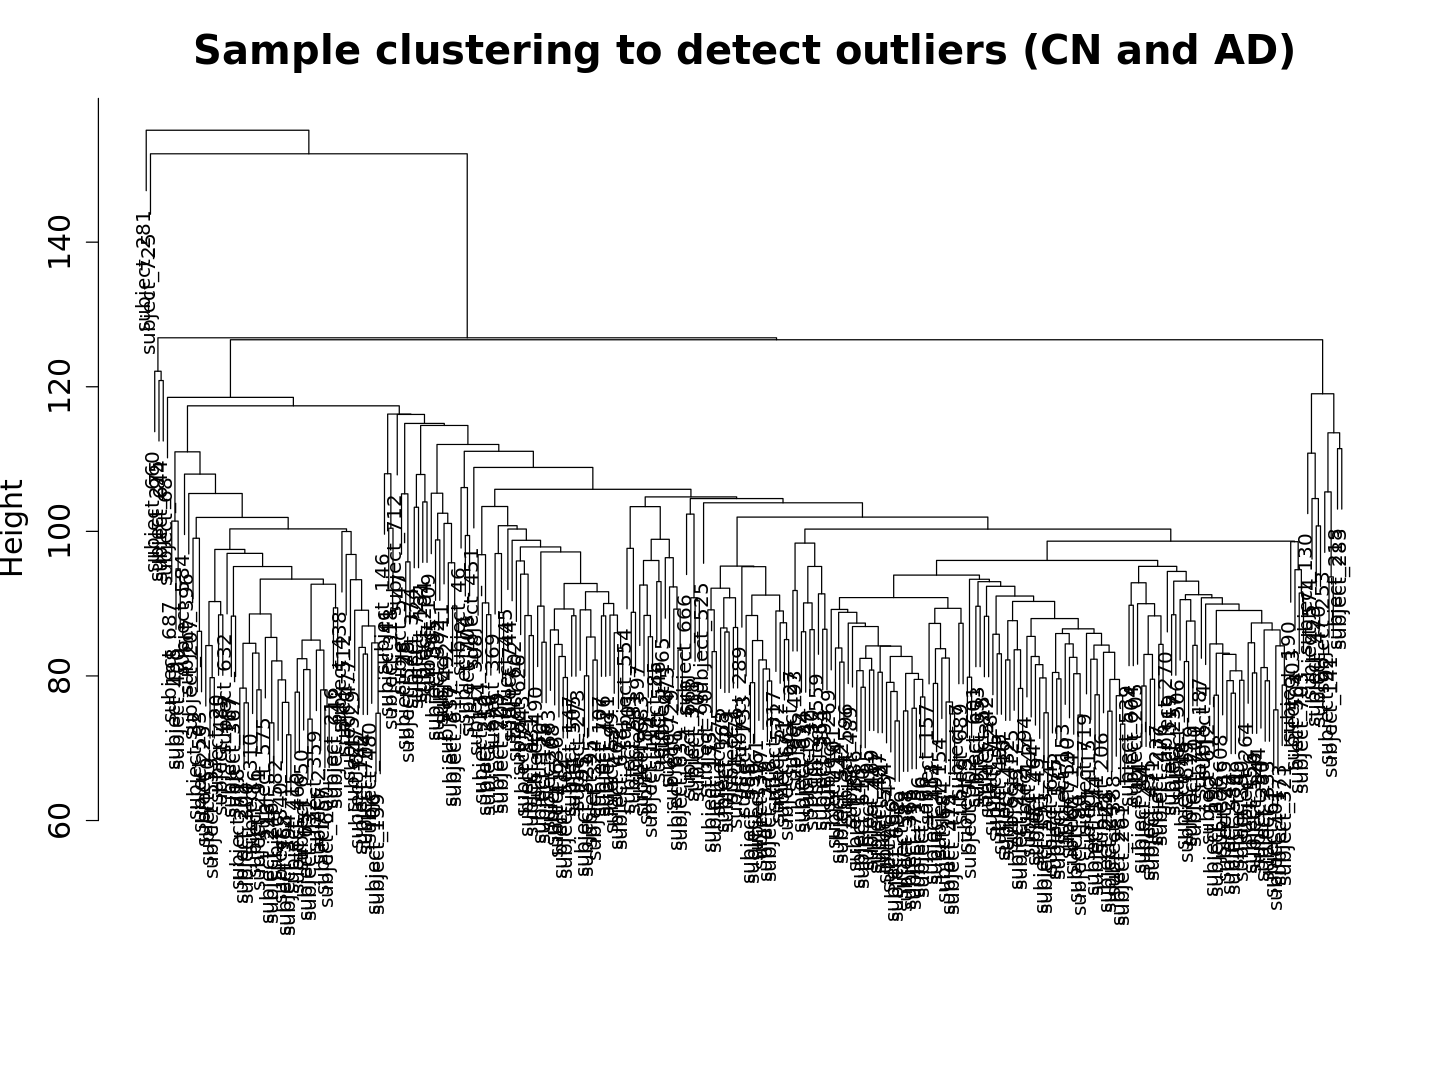

In [24]:
options(repr.plot.width=12, repr.plot.height=9)
sampleTree_CN_AD <- hclust(dist(datExpr0_CN_AD), method="average")

# plot sample tree
plot(sampleTree_CN_AD, main = "Sample clustering to detect outliers (CN and AD)", sub="", xlab="", cex.lab = 1.5,
     cex.axis = 1.5, cex.main = 2)

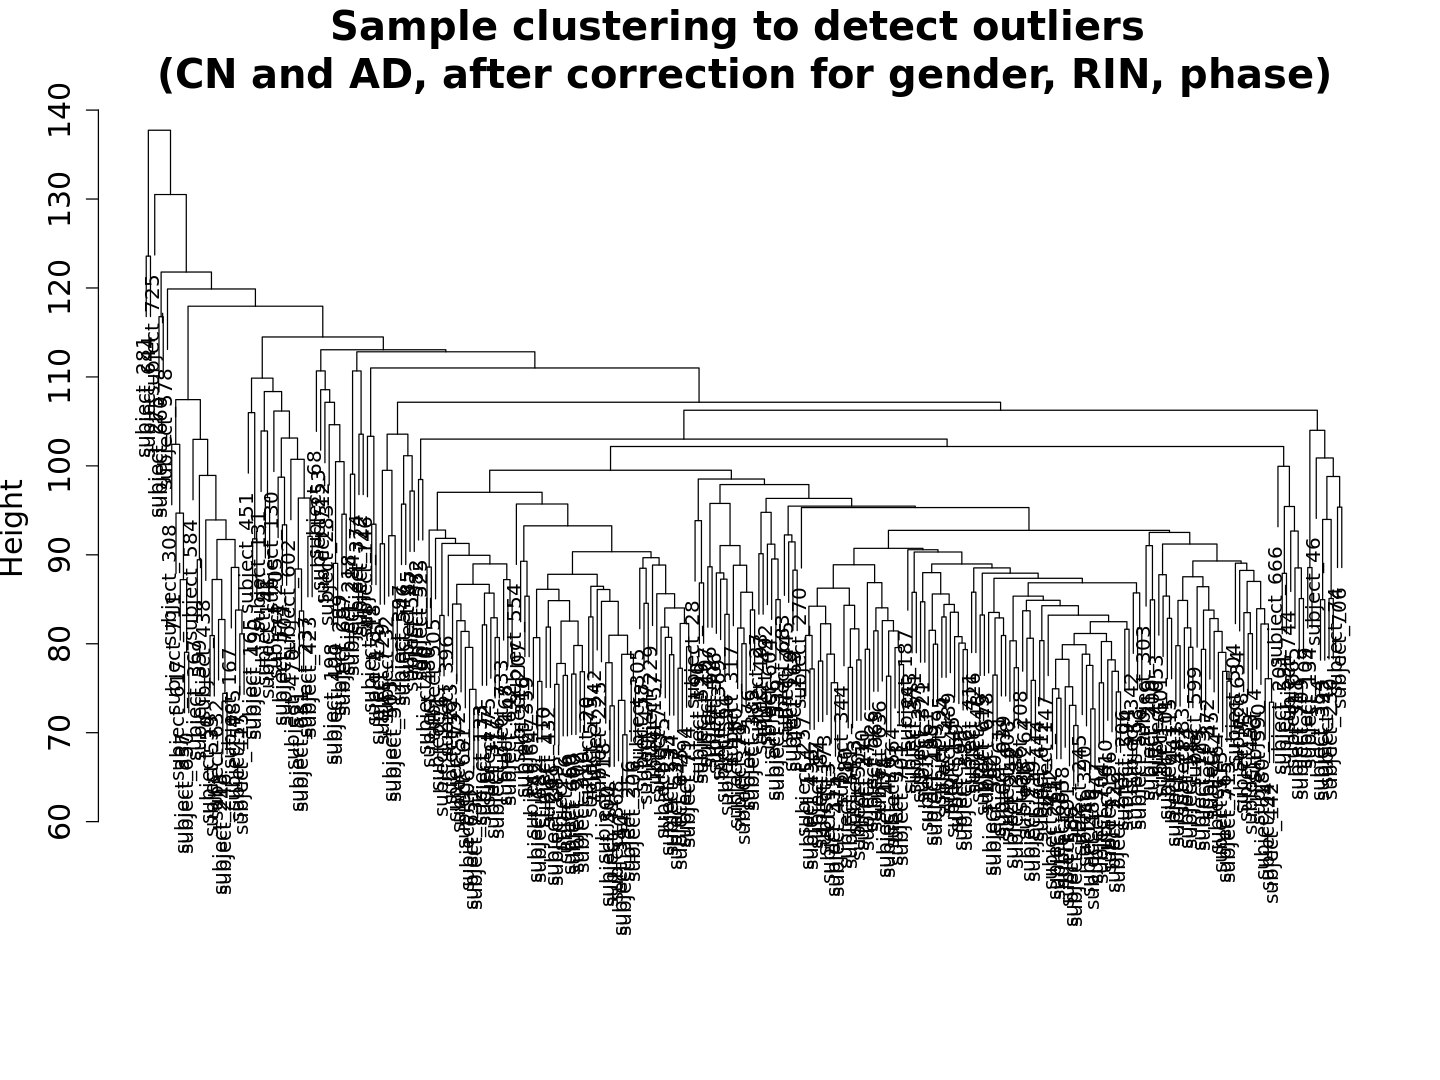

In [22]:
options(repr.plot.width=12, repr.plot.height=9)
sampleTree_CN_AD_corrected <- hclust(dist(datExpr0_CN_AD_gender_rin_phase_corrected), method="average")

# plot sample tree
plot(sampleTree_CN_AD_corrected, 
     main = "Sample clustering to detect outliers \n(CN and AD, after correction for gender, RIN, phase)", 
     sub="", xlab="", cex.lab = 1.5,
     cex.axis = 1.5, cex.main = 2)

In [70]:
# select datTraits subjects based on CN and AD subjects
datTraits_CN_AD <- datTraits_allAPOE_selectCols[datExpr0_CN_AD %>% rownames, ]

# replace CN with 0 and AD with 1
datTraits_CN_AD$ADNIMERGE_Dx <- as.character(datTraits_CN_AD$ADNIMERGE_Dx)
datTraits_CN_AD$ADNIMERGE_Dx[datTraits_CN_AD$ADNIMERGE_Dx == "CN"]  <- 0
datTraits_CN_AD$ADNIMERGE_Dx[datTraits_CN_AD$ADNIMERGE_Dx == "Dementia"]  <- 1
datTraits_CN_AD$ADNIMERGE_Dx  <- as.numeric(datTraits_CN_AD$ADNIMERGE_Dx)

# convert rownames to subjectID for both datTraits and datExpr
datExpr_CN_AD <- datExpr0_CN_AD
rownames(datExpr_CN_AD) <- datTraits_CN_AD[rownames(datExpr_CN_AD), ]$SubjectID
rownames(datTraits_CN_AD) <- datTraits_CN_AD$SubjectID
datTraits_CN_AD <- datTraits_CN_AD[2:ncol(datTraits_CN_AD)] # remove subjectID column

datExpr_CN_AD %>% head
datTraits_CN_AD %>% head

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,⋯,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
116_S_1249,2.237,2.624,1.873,2.920,2.147,2.268,2.432,4.600,2.771,2.931,⋯,2.355,2.624,2.010,2.906,2.463,2.050,2.060,1.858,2.028,2.162
037_S_4410,2.294,2.416,1.884,2.668,2.156,2.130,2.270,4.547,2.363,2.548,⋯,2.100,2.820,1.726,2.465,2.260,1.933,1.717,2.208,2.058,1.882
006_S_4153,2.140,2.322,1.999,3.634,2.516,1.957,2.333,4.442,2.544,2.814,⋯,2.165,2.455,1.840,2.681,2.251,1.985,1.770,2.184,2.007,2.134
116_S_1232,2.062,2.500,1.851,3.632,2.283,2.347,2.258,4.608,2.233,3.156,⋯,2.094,2.599,1.837,2.713,2.158,1.916,1.878,2.163,2.185,2.099
128_S_0205,1.955,2.451,1.539,3.362,1.992,2.323,2.166,4.587,2.517,2.731,⋯,2.220,2.891,1.823,2.300,2.325,2.063,1.824,2.063,1.838,1.829
037_S_4308,2.110,2.093,1.886,3.263,2.127,2.181,2.542,4.361,2.155,2.634,⋯,2.225,2.737,1.806,2.598,2.332,1.954,2.114,2.274,1.880,2.125


,Phase,RIN,ADNIMERGE_Dx,Age,DX_bl,PTGENDER,APOE2,APOE3,APOE4
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
116_S_1249,1,7.7,0,75,0,1,0,1,1
037_S_4410,0,7.6,0,70,0,1,0,2,0
006_S_4153,0,7.2,1,79,3,0,0,1,1
116_S_1232,1,6.8,0,77,0,1,0,2,0
128_S_0205,0,7.9,0,72,2,1,0,2,0
037_S_4308,0,7.8,0,74,0,0,1,1,0


In [23]:
# select datTraits subjects based on CN and AD subjects
datTraits_CN_AD_gender_rin_phase_corrected <- datTraits_allAPOE_selectCols[datExpr0_CN_AD_gender_rin_phase_corrected %>% rownames, ]

# replace CN with 0 and AD with 1
datTraits_CN_AD_gender_rin_phase_corrected$ADNIMERGE_Dx <- as.character(datTraits_CN_AD_gender_rin_phase_corrected$ADNIMERGE_Dx)
datTraits_CN_AD_gender_rin_phase_corrected$ADNIMERGE_Dx[datTraits_CN_AD_gender_rin_phase_corrected$ADNIMERGE_Dx == "CN"]  <- 0
datTraits_CN_AD_gender_rin_phase_corrected$ADNIMERGE_Dx[datTraits_CN_AD_gender_rin_phase_corrected$ADNIMERGE_Dx == "Dementia"]  <- 1
datTraits_CN_AD_gender_rin_phase_corrected$ADNIMERGE_Dx  <- as.numeric(datTraits_CN_AD_gender_rin_phase_corrected$ADNIMERGE_Dx)

# convert rownames to subjectID for both datTraits and datExpr
datExpr_CN_AD_gender_rin_phase_corrected <- datExpr0_CN_AD_gender_rin_phase_corrected
rownames(datExpr_CN_AD_gender_rin_phase_corrected) <- datTraits_CN_AD_gender_rin_phase_corrected[rownames(datExpr_CN_AD_gender_rin_phase_corrected), ]$SubjectID
rownames(datTraits_CN_AD_gender_rin_phase_corrected) <- datTraits_CN_AD_gender_rin_phase_corrected$SubjectID
datTraits_CN_AD_gender_rin_phase_corrected <- datTraits_CN_AD_gender_rin_phase_corrected[2:ncol(datTraits_CN_AD_gender_rin_phase_corrected)] # remove subjectID column

datExpr_CN_AD_gender_rin_phase_corrected %>% head
datTraits_CN_AD_gender_rin_phase_corrected %>% head

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,⋯,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
116_S_1249,3.004470,3.792256,2.434135,4.132315,2.311101,2.384031,2.681331,5.669519,2.684512,3.434631,⋯,2.600139,2.639528,2.342106,3.410763,2.686155,2.078246,2.061660,2.191224,2.486827,2.284362
037_S_4410,3.103941,3.577882,2.464426,3.942098,2.354697,2.214768,2.528512,5.660697,2.271689,3.068075,⋯,2.345067,2.848346,2.072297,2.960938,2.481373,1.953275,1.712699,2.554118,2.527264,2.046397
006_S_4153,2.884698,3.425941,2.566171,4.753200,2.660232,2.000275,2.551101,5.447086,2.456558,3.264727,⋯,2.350234,2.465514,2.145057,3.130390,2.451847,2.047032,1.787188,2.484189,2.457319,2.267706
116_S_1232,2.733556,3.530664,2.343400,4.693435,2.423571,2.452993,2.476718,5.545634,2.157325,3.598043,⋯,2.310118,2.611172,2.128097,3.159033,2.354940,1.941845,1.880169,2.455236,2.588256,2.201894
128_S_0205,2.796912,3.658746,2.142337,4.686391,2.198540,2.411114,2.434716,5.744658,2.422085,3.271604,⋯,2.474741,2.920464,2.182967,2.815515,2.555111,2.084076,1.819529,2.422781,2.325787,1.999887
037_S_4308,2.918641,3.288668,2.498994,4.482787,2.286919,2.230967,2.780510,5.454010,2.060350,3.125786,⋯,2.429582,2.749752,2.138396,3.086543,2.550323,2.017633,2.130848,2.601515,2.367366,2.271685


,Phase,RIN,ADNIMERGE_Dx,Age,DX_bl,PTGENDER,APOE2,APOE3,APOE4
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
116_S_1249,1,7.7,0,75,0,1,0,1,1
037_S_4410,0,7.6,0,70,0,1,0,2,0
006_S_4153,0,7.2,1,79,3,0,0,1,1
116_S_1232,1,6.8,0,77,0,1,0,2,0
128_S_0205,0,7.9,0,72,2,1,0,2,0
037_S_4308,0,7.8,0,74,0,0,1,1,0


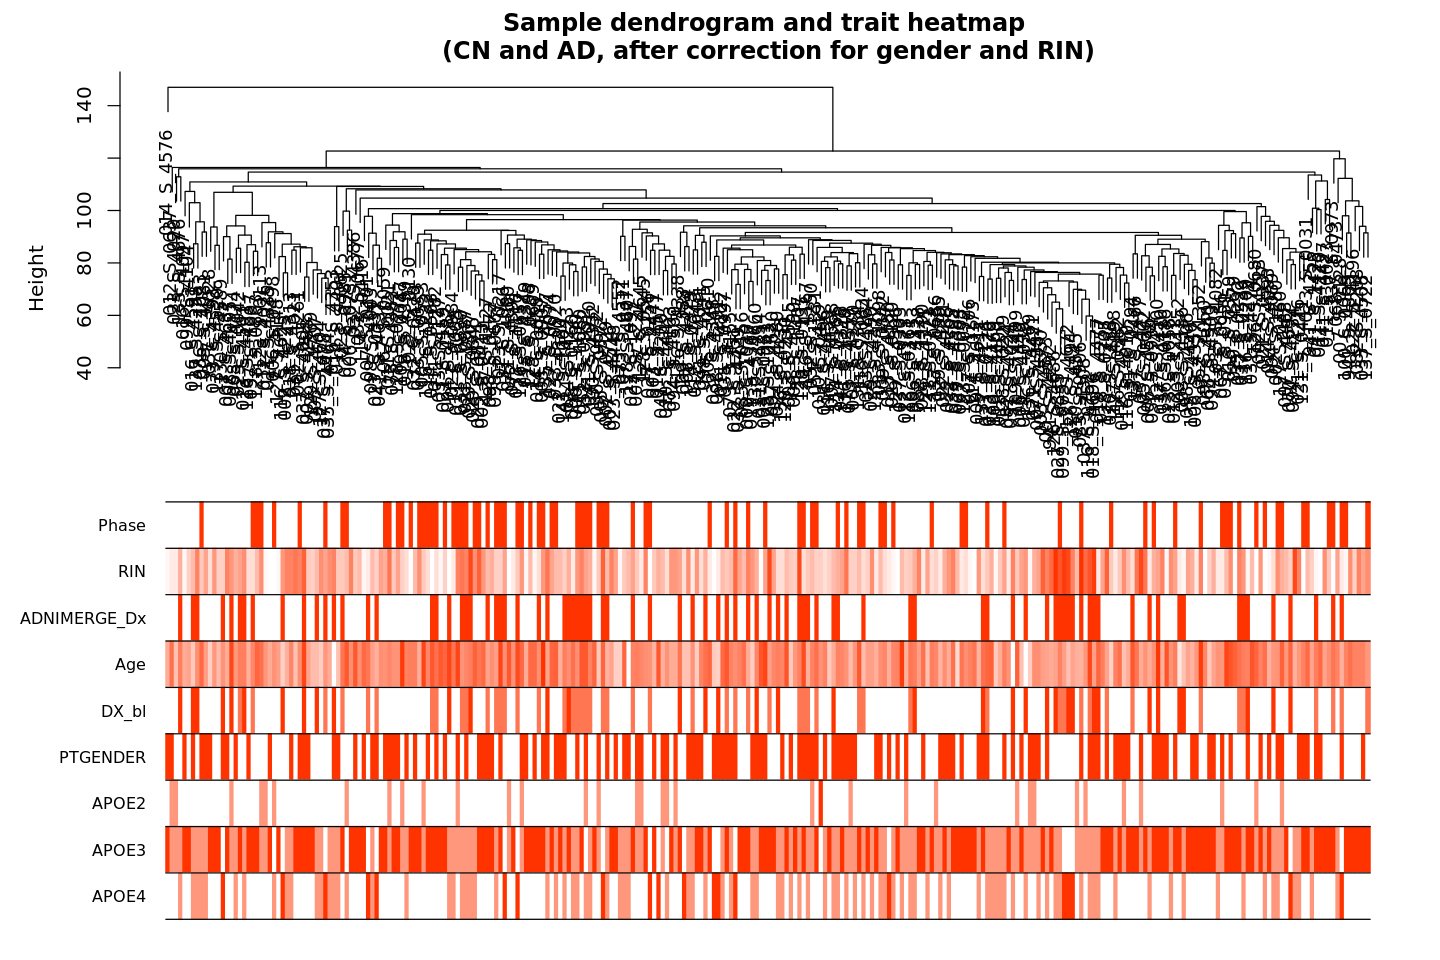

In [71]:
options(repr.plot.width=12, repr.plot.height=8)
# Re-cluster samples
sampleTree2_CN_AD <- hclust(dist(datExpr_CN_AD.gender_rin_corrected), method = "average")
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors_CN_AD= numbers2colors(datTraits_CN_AD, signed = FALSE);
# Plot the sample dendrogram and the colors underneath.s
plotDendroAndColors(sampleTree2_CN_AD, traitColors_CN_AD,
                    groupLabels = names(datTraits_CN_AD),
                    main = "Sample dendrogram and trait heatmap \n(CN and AD, after correction for gender and RIN)")

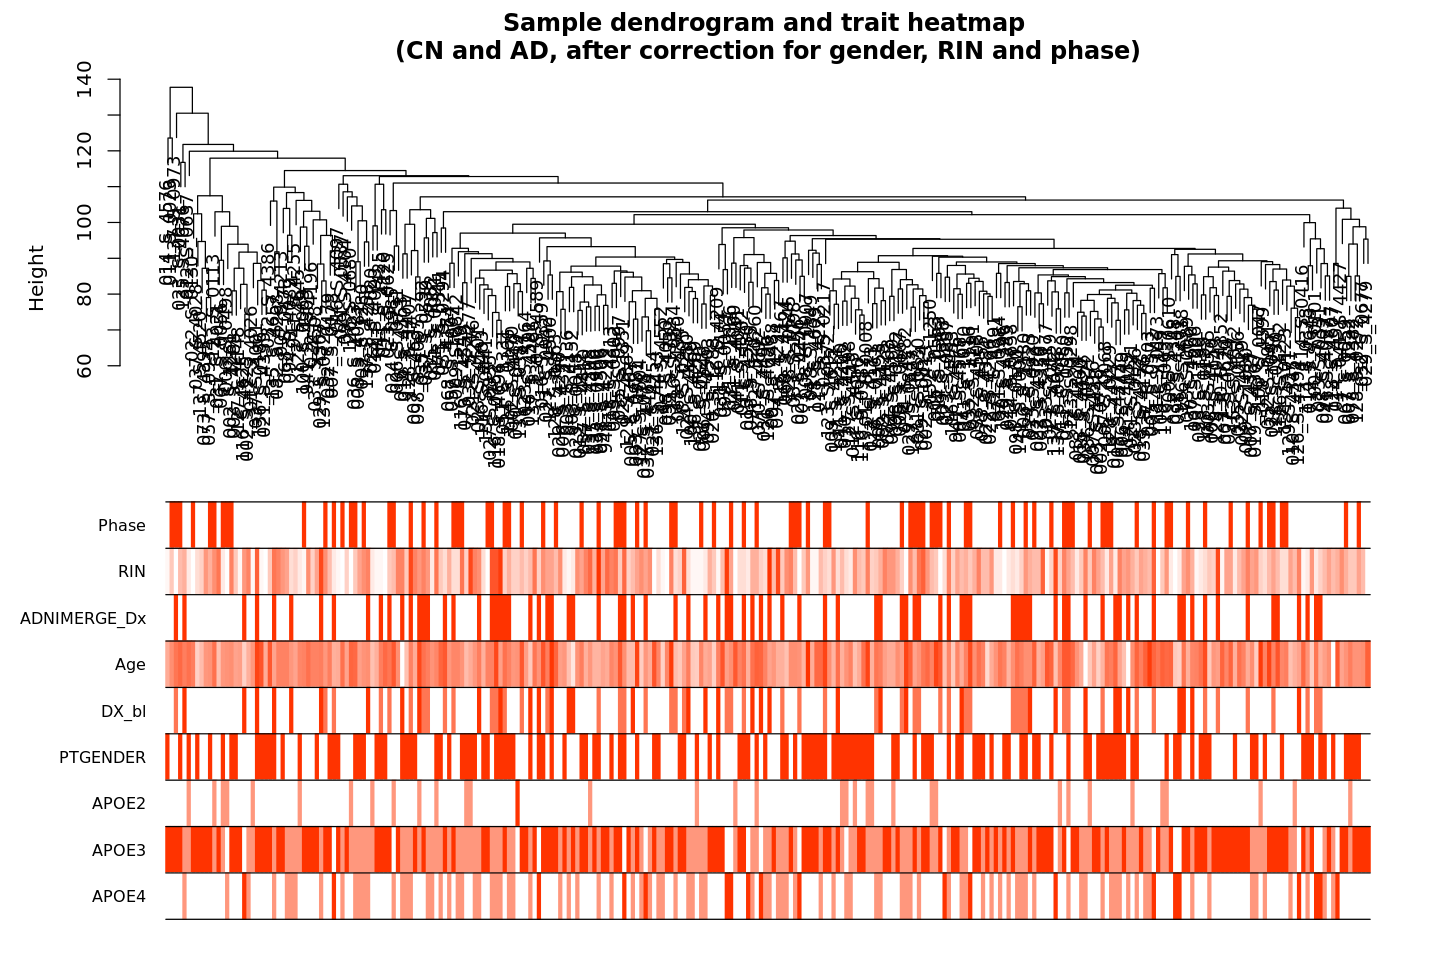

In [24]:
options(repr.plot.width=12, repr.plot.height=8)
# Re-cluster samples
sampleTree2_CN_AD_gender_rin_phase_corrected <- hclust(dist(datExpr_CN_AD_gender_rin_phase_corrected), method = "average")
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors_CN_AD_gender_rin_phase_corrected = numbers2colors(datTraits_CN_AD_gender_rin_phase_corrected, signed = FALSE);
# Plot the sample dendrogram and the colors underneath.s
plotDendroAndColors(sampleTree2_CN_AD_gender_rin_phase_corrected, traitColors_CN_AD_gender_rin_phase_corrected,
                    groupLabels = names(datTraits_CN_AD_gender_rin_phase_corrected),
                    main = "Sample dendrogram and trait heatmap \n(CN and AD, after correction for gender, RIN and phase)")

In [25]:
pdf("pairwise_plots/sampleDendro_CN_AD_limmaCorrected.pdf", 
    width = 12, height = 8)

options(repr.plot.width=12, repr.plot.height=8)
# Re-cluster samples
sampleTree2_CN_AD <- hclust(dist(datExpr_CN_AD.gender_rin_corrected), method = "average")
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors_CN_AD= numbers2colors(datTraits_CN_AD, signed = FALSE);
# Plot the sample dendrogram and the colors underneath.s
plotDendroAndColors(sampleTree2_CN_AD, traitColors_CN_AD,
                    groupLabels = names(datTraits_CN_AD),
                    main = "Sample dendrogram and trait heatmap \n(CN and AD, after correction for gender and RIN)")

dev.off()

ERROR: Error in as.matrix(x): object 'datExpr_CN_AD.gender_rin_corrected' not found


In [26]:
pdf("pairwise_plots/sampleDendro_CN_AD_gender_rin_phase_corrected.pdf", 
    width = 12, height = 8)

options(repr.plot.width=12, repr.plot.height=8)
# Re-cluster samples
sampleTree2_CN_AD_gender_rin_phase_corrected <- hclust(dist(datExpr_CN_AD_gender_rin_phase_corrected), method = "average")
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors_CN_AD_gender_rin_phase_corrected = numbers2colors(datTraits_CN_AD_gender_rin_phase_corrected, signed = FALSE);
# Plot the sample dendrogram and the colors underneath.s
plotDendroAndColors(sampleTree2_CN_AD_gender_rin_phase_corrected, traitColors_CN_AD_gender_rin_phase_corrected,
                    groupLabels = names(datTraits_CN_AD_gender_rin_phase_corrected),
                    main = "Sample dendrogram and trait heatmap \n(CN and AD, after correction for gender, RIN and phase)")

dev.off()

png 
  2

### CN and MCI

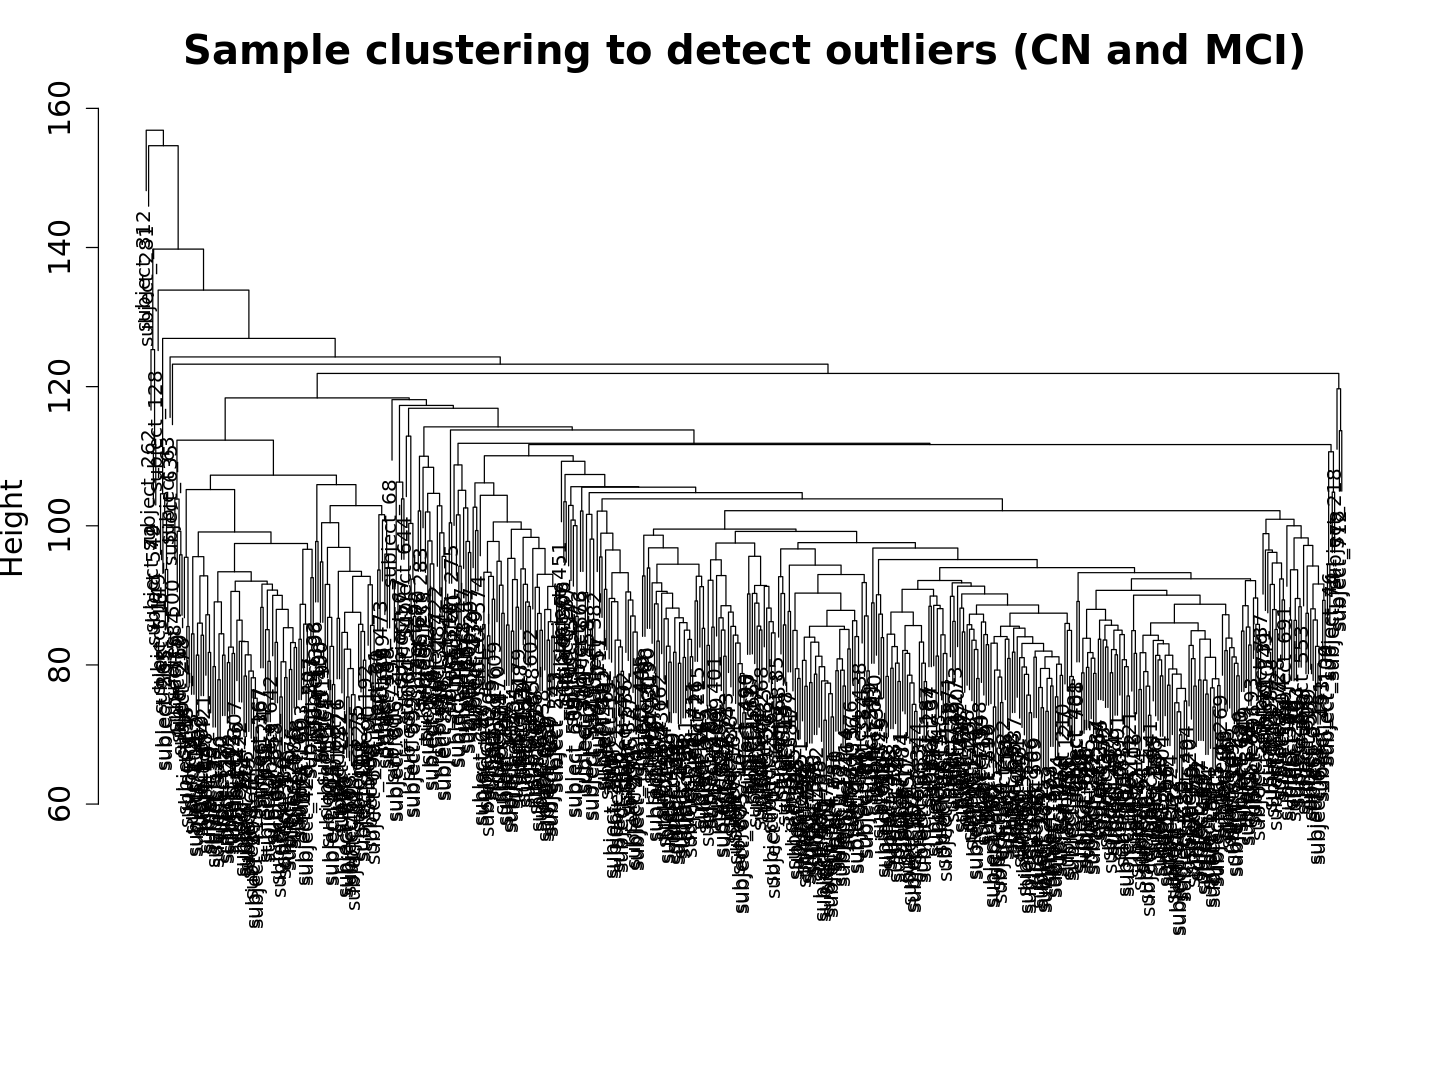

In [25]:
options(repr.plot.width=12, repr.plot.height=9)
sampleTree_CN_MCI <- hclust(dist(datExpr0_CN_MCI), method="average")

# plot sample tree
plot(sampleTree_CN_MCI, main = "Sample clustering to detect outliers (CN and MCI)", sub="", xlab="", cex.lab = 1.5,
     cex.axis = 1.5, cex.main = 2)

In [66]:
# select datTraits subjects based on CN and MCI subjects
datTraits_CN_MCI <- datTraits_allAPOE_selectCols[datExpr0_CN_MCI %>% rownames, ]

# replace CN with 0 and MCI with 1
datTraits_CN_MCI$ADNIMERGE_Dx <- as.character(datTraits_CN_MCI$ADNIMERGE_Dx)
datTraits_CN_MCI$ADNIMERGE_Dx[datTraits_CN_MCI$ADNIMERGE_Dx == "CN"]  <- 0
datTraits_CN_MCI$ADNIMERGE_Dx[datTraits_CN_MCI$ADNIMERGE_Dx == "MCI"]  <- 1
datTraits_CN_MCI$ADNIMERGE_Dx  <- as.numeric(datTraits_CN_MCI$ADNIMERGE_Dx)

# convert rownames to subjectID for both datTraits and datExpr
datExpr_CN_MCI <- datExpr0_CN_MCI
rownames(datExpr_CN_MCI) <- datTraits_CN_MCI[rownames(datExpr_CN_MCI), ]$SubjectID
rownames(datTraits_CN_MCI) <- datTraits_CN_MCI$SubjectID
datTraits_CN_MCI <- datTraits_CN_MCI[2:ncol(datTraits_CN_MCI)] # remove subjectID column

datExpr_CN_MCI %>% head
datTraits_CN_MCI %>% head

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,⋯,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
116_S_1249,2.237,2.624,1.873,2.920,2.147,2.268,2.432,4.600,2.771,2.931,⋯,2.355,2.624,2.010,2.906,2.463,2.050,2.060,1.858,2.028,2.162
037_S_4410,2.294,2.416,1.884,2.668,2.156,2.130,2.270,4.547,2.363,2.548,⋯,2.100,2.820,1.726,2.465,2.260,1.933,1.717,2.208,2.058,1.882
116_S_1232,2.062,2.500,1.851,3.632,2.283,2.347,2.258,4.608,2.233,3.156,⋯,2.094,2.599,1.837,2.713,2.158,1.916,1.878,2.163,2.185,2.099
099_S_4205,2.040,2.395,2.080,3.278,2.251,2.154,2.334,4.536,2.546,2.864,⋯,1.973,2.544,1.909,2.548,2.266,2.077,1.838,2.085,1.941,1.883
007_S_4467,2.439,2.309,1.997,3.578,2.235,2.055,2.450,4.805,2.576,3.043,⋯,2.143,2.653,1.834,2.594,2.432,1.788,1.872,2.266,1.902,1.902
128_S_0205,1.955,2.451,1.539,3.362,1.992,2.323,2.166,4.587,2.517,2.731,⋯,2.220,2.891,1.823,2.300,2.325,2.063,1.824,2.063,1.838,1.829


,Phase,RIN,ADNIMERGE_Dx,Age,DX_bl,PTGENDER,APOE2,APOE3,APOE4
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
116_S_1249,1,7.7,0,75,0,1,0,1,1
037_S_4410,0,7.6,0,70,0,1,0,2,0
116_S_1232,1,6.8,0,77,0,1,0,2,0
099_S_4205,0,7.9,1,81,1,1,0,2,0
007_S_4467,0,7.0,1,62,1,1,0,0,2
128_S_0205,0,7.9,0,72,2,1,0,2,0


In [61]:
# Batch correct for effects of PTGENDER and RIN
datExpr_CN_MCI.gender_rin_corrected <- datExpr_CN_MCI %>% t %>% limma::removeBatchEffect(
    batch = (datTraits_allAPOE[datExpr0_CN_MCI %>% rownames,])$PTGENDER, 
    batch2 = (datTraits_allAPOE[datExpr0_CN_MCI %>% rownames,])$RIN) %>% t %>% as.data.frame

datExpr_CN_MCI.gender_rin_corrected %>% head

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,⋯,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
116_S_1249,2.235989,2.648124,1.855769,2.985628,2.177079,2.260124,2.470986,4.677460,2.700751,2.970027,⋯,2.318154,2.641931,2.054514,2.882463,2.443372,2.061745,2.034349,1.889030,2.037935,2.206668
037_S_4410,2.305574,2.439080,1.868581,2.739724,2.162965,2.143634,2.289423,4.589205,2.377939,2.584805,⋯,2.113030,2.875968,1.731623,2.462172,2.241352,1.937416,1.725740,2.214300,2.063379,1.895036
116_S_1232,2.062263,2.482185,1.811511,3.529337,2.255391,2.345211,2.276855,4.564286,2.231239,3.097398,⋯,2.065519,2.646074,1.800672,2.696941,2.156546,1.881417,1.840241,2.160299,2.182198,2.089630
099_S_4205,2.131961,2.441969,2.138471,3.373450,2.247026,2.136823,2.369682,4.632898,2.535791,2.907415,⋯,2.036061,2.550879,1.984995,2.601227,2.304141,2.056152,1.817725,2.192841,1.983218,1.898224
007_S_4467,2.396954,2.265683,1.976710,3.528699,2.243958,2.052110,2.426950,4.724082,2.547173,3.030662,⋯,2.174118,2.670455,1.821229,2.588050,2.434398,1.763421,1.824992,2.269862,1.902004,1.936620
128_S_0205,2.046961,2.497969,1.597471,3.457450,1.988026,2.305823,2.201682,4.683898,2.506791,2.774415,⋯,2.283061,2.897879,1.898995,2.353227,2.363141,2.042152,1.803725,2.170841,1.880218,1.844224


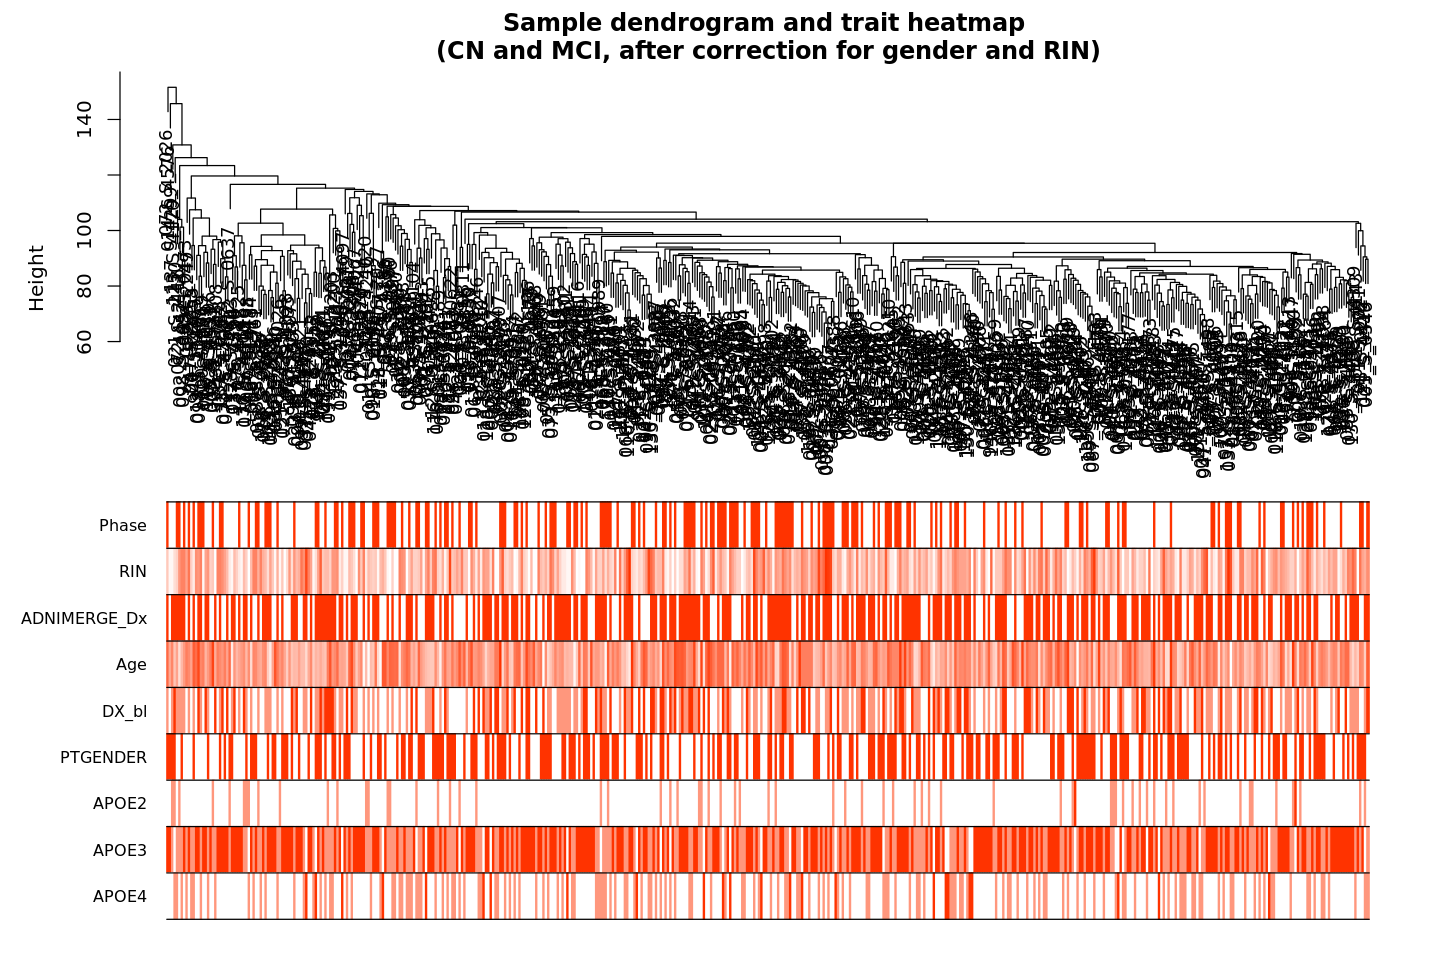

In [67]:
options(repr.plot.width=12, repr.plot.height=8)
# Re-cluster samples
sampleTree2_CN_MCI <- hclust(dist(datExpr_CN_MCI.gender_rin_corrected), method = "average")
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors_CN_MCI= numbers2colors(datTraits_CN_MCI, signed = FALSE);
# Plot the sample dendrogram and the colors underneath.s
plotDendroAndColors(sampleTree2_CN_MCI, traitColors_CN_MCI,
                    groupLabels = names(datTraits_CN_MCI),
                    main = "Sample dendrogram and trait heatmap \n(CN and MCI, after correction for gender and RIN)")

In [78]:
pdf("pairwise_plots/sampleDendro_CN_MCI_limmaCorrected.pdf", 
    width = 12, height = 8)

options(repr.plot.width=12, repr.plot.height=8)
# Re-cluster samples
sampleTree2_CN_MCI <- hclust(dist(datExpr_CN_MCI.gender_rin_corrected), method = "average")
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors_CN_MCI= numbers2colors(datTraits_CN_MCI, signed = FALSE);
# Plot the sample dendrogram and the colors underneath.s
plotDendroAndColors(sampleTree2_CN_MCI, traitColors_CN_MCI,
                    groupLabels = names(datTraits_CN_MCI),
                    main = "Sample dendrogram and trait heatmap \n(CN and MCI, after correction for gender and RIN)")

dev.off()

png 
  2

In [27]:
# Batch correct for effects of PTGENDER, RIN AND PHASE
design_CN_MCI <- model.matrix(~ (datTraits_allAPOE[datExpr0_CN_MCI %>% rownames,])$ADNIMERGE_Dx + 
                       (datTraits_allAPOE[datExpr0_CN_MCI %>% rownames,])$Phase + 
                       (datTraits_allAPOE[datExpr0_CN_MCI %>% rownames,])$RIN + 
                       (datTraits_allAPOE[datExpr0_CN_MCI %>% rownames,])$PTGENDER,
                       data=datExpr0_CN_MCI)

design_CN_MCI %>% head

,(Intercept),"(datTraits_allAPOE[datExpr0_CN_MCI %>% rownames, ])$ADNIMERGE_DxMCI","(datTraits_allAPOE[datExpr0_CN_MCI %>% rownames, ])$PhaseADNIGO","(datTraits_allAPOE[datExpr0_CN_MCI %>% rownames, ])$RIN","(datTraits_allAPOE[datExpr0_CN_MCI %>% rownames, ])$PTGENDERMale"
subject_1,1,0,1,7.7,0
subject_2,1,0,0,7.6,0
subject_4,1,0,1,6.8,0
subject_5,1,1,0,7.9,0
subject_6,1,1,0,7.0,0
subject_7,1,0,0,7.9,0


In [28]:
treatment.design_CN_MCI <- design_CN_MCI[,1:2]
batch.design_CN_MCI <- design_CN_MCI[,-(1:2)]
corrected_df_CN_MCI <- removeBatchEffect(t(datExpr0_CN_MCI),
                                        design=treatment.design_CN_MCI,
                                        covariates=batch.design_CN_MCI) %>% t %>% as.data.frame

In [30]:
corrected_df_CN_MCI %>% head
datExpr0_CN_MCI_gender_rin_phase_corrected <- corrected_df_CN_MCI

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,⋯,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
subject_1,2.773051,3.797763,2.385113,4.062690,2.569712,2.329341,2.461513,5.926862,2.890251,3.157762,⋯,2.555519,2.740871,2.304522,3.331256,2.799923,2.337489,2.136599,2.256328,2.359085,2.286607
subject_2,2.826046,3.559757,2.385883,3.854294,2.599425,2.183802,2.303766,5.885852,2.479684,2.806121,⋯,2.296676,2.924880,2.020330,2.898733,2.600641,2.199099,1.803218,2.618836,2.409179,2.022423
subject_4,2.535046,3.538318,2.303680,4.634207,2.653201,2.401970,2.283514,5.776313,2.338433,3.352195,⋯,2.271228,2.703451,2.096667,3.086893,2.454584,2.171978,1.944389,2.512676,2.474498,2.206978
subject_5,2.593048,3.583905,2.601694,4.511121,2.711929,2.209926,2.369099,5.927702,2.667290,3.132310,⋯,2.177440,2.653020,2.214949,2.998855,2.620087,2.353602,1.927621,2.512054,2.306041,2.028966
subject_6,2.929042,3.362460,2.459260,4.670639,2.643418,2.104555,2.481100,6.038153,2.683472,3.280743,⋯,2.324149,2.749600,2.105094,2.993491,2.745748,2.033091,1.951411,2.644402,2.225454,2.031337
subject_7,2.508048,3.639905,2.060694,4.595121,2.452929,2.378926,2.201099,5.978702,2.638290,2.999310,⋯,2.424440,3.000020,2.128949,2.750855,2.679087,2.339602,1.913621,2.490054,2.203041,1.974966


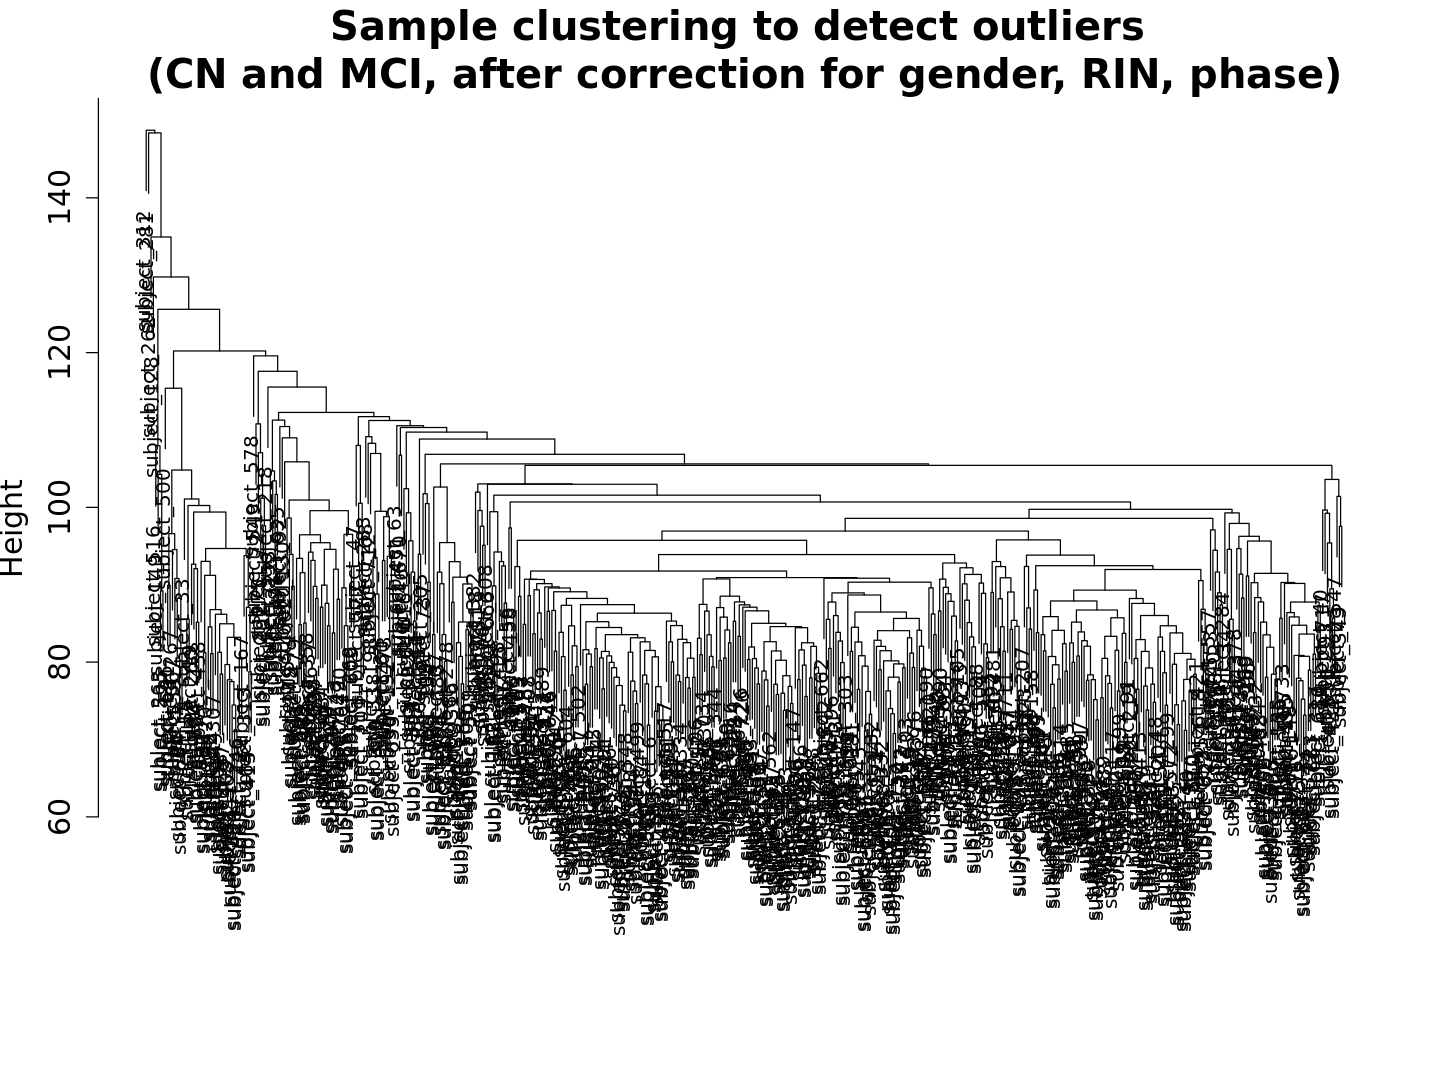

In [31]:
options(repr.plot.width=12, repr.plot.height=9)
sampleTree_CN_MCI_corrected <- hclust(dist(datExpr0_CN_MCI_gender_rin_phase_corrected), method="average")

# plot sample tree
plot(sampleTree_CN_MCI_corrected, 
     main = "Sample clustering to detect outliers \n(CN and MCI, after correction for gender, RIN, phase)", 
     sub="", xlab="", cex.lab = 1.5,
     cex.axis = 1.5, cex.main = 2)

In [38]:
# select datTraits subjects based on CN and MCI subjects
datTraits_CN_MCI_gender_rin_phase_corrected <- datTraits_allAPOE_selectCols[datExpr0_CN_MCI_gender_rin_phase_corrected %>% rownames, ]

# replace CN with 0 and AD with 1
datTraits_CN_MCI_gender_rin_phase_corrected$ADNIMERGE_Dx <- as.character(datTraits_CN_MCI_gender_rin_phase_corrected$ADNIMERGE_Dx)
datTraits_CN_MCI_gender_rin_phase_corrected$ADNIMERGE_Dx[datTraits_CN_MCI_gender_rin_phase_corrected$ADNIMERGE_Dx == "CN"]  <- 0
datTraits_CN_MCI_gender_rin_phase_corrected$ADNIMERGE_Dx[datTraits_CN_MCI_gender_rin_phase_corrected$ADNIMERGE_Dx == "MCI"]  <- 1
datTraits_CN_MCI_gender_rin_phase_corrected$ADNIMERGE_Dx  <- as.numeric(datTraits_CN_MCI_gender_rin_phase_corrected$ADNIMERGE_Dx)

# convert rownames to subjectID for both datTraits and datExpr
datExpr_CN_MCI_gender_rin_phase_corrected <- datExpr0_CN_MCI_gender_rin_phase_corrected
rownames(datExpr_CN_MCI_gender_rin_phase_corrected) <- datTraits_CN_MCI_gender_rin_phase_corrected[rownames(datExpr_CN_MCI_gender_rin_phase_corrected), ]$SubjectID
rownames(datTraits_CN_MCI_gender_rin_phase_corrected) <- datTraits_CN_MCI_gender_rin_phase_corrected$SubjectID
datTraits_CN_MCI_gender_rin_phase_corrected <- datTraits_CN_MCI_gender_rin_phase_corrected[2:ncol(datTraits_CN_MCI_gender_rin_phase_corrected)] # remove subjectID column

datExpr_CN_MCI_gender_rin_phase_corrected %>% head
datTraits_CN_MCI_gender_rin_phase_corrected %>% head

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,⋯,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
116_S_1249,2.773051,3.797763,2.385113,4.062690,2.569712,2.329341,2.461513,5.926862,2.890251,3.157762,⋯,2.555519,2.740871,2.304522,3.331256,2.799923,2.337489,2.136599,2.256328,2.359085,2.286607
037_S_4410,2.826046,3.559757,2.385883,3.854294,2.599425,2.183802,2.303766,5.885852,2.479684,2.806121,⋯,2.296676,2.924880,2.020330,2.898733,2.600641,2.199099,1.803218,2.618836,2.409179,2.022423
116_S_1232,2.535046,3.538318,2.303680,4.634207,2.653201,2.401970,2.283514,5.776313,2.338433,3.352195,⋯,2.271228,2.703451,2.096667,3.086893,2.454584,2.171978,1.944389,2.512676,2.474498,2.206978
099_S_4205,2.593048,3.583905,2.601694,4.511121,2.711929,2.209926,2.369099,5.927702,2.667290,3.132310,⋯,2.177440,2.653020,2.214949,2.998855,2.620087,2.353602,1.927621,2.512054,2.306041,2.028966
007_S_4467,2.929042,3.362460,2.459260,4.670639,2.643418,2.104555,2.481100,6.038153,2.683472,3.280743,⋯,2.324149,2.749600,2.105094,2.993491,2.745748,2.033091,1.951411,2.644402,2.225454,2.031337
128_S_0205,2.508048,3.639905,2.060694,4.595121,2.452929,2.378926,2.201099,5.978702,2.638290,2.999310,⋯,2.424440,3.000020,2.128949,2.750855,2.679087,2.339602,1.913621,2.490054,2.203041,1.974966


,Phase,RIN,ADNIMERGE_Dx,Age,DX_bl,PTGENDER,APOE2,APOE3,APOE4
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
116_S_1249,1,7.7,0,75,0,1,0,1,1
037_S_4410,0,7.6,0,70,0,1,0,2,0
116_S_1232,1,6.8,0,77,0,1,0,2,0
099_S_4205,0,7.9,1,81,1,1,0,2,0
007_S_4467,0,7.0,1,62,1,1,0,0,2
128_S_0205,0,7.9,0,72,2,1,0,2,0


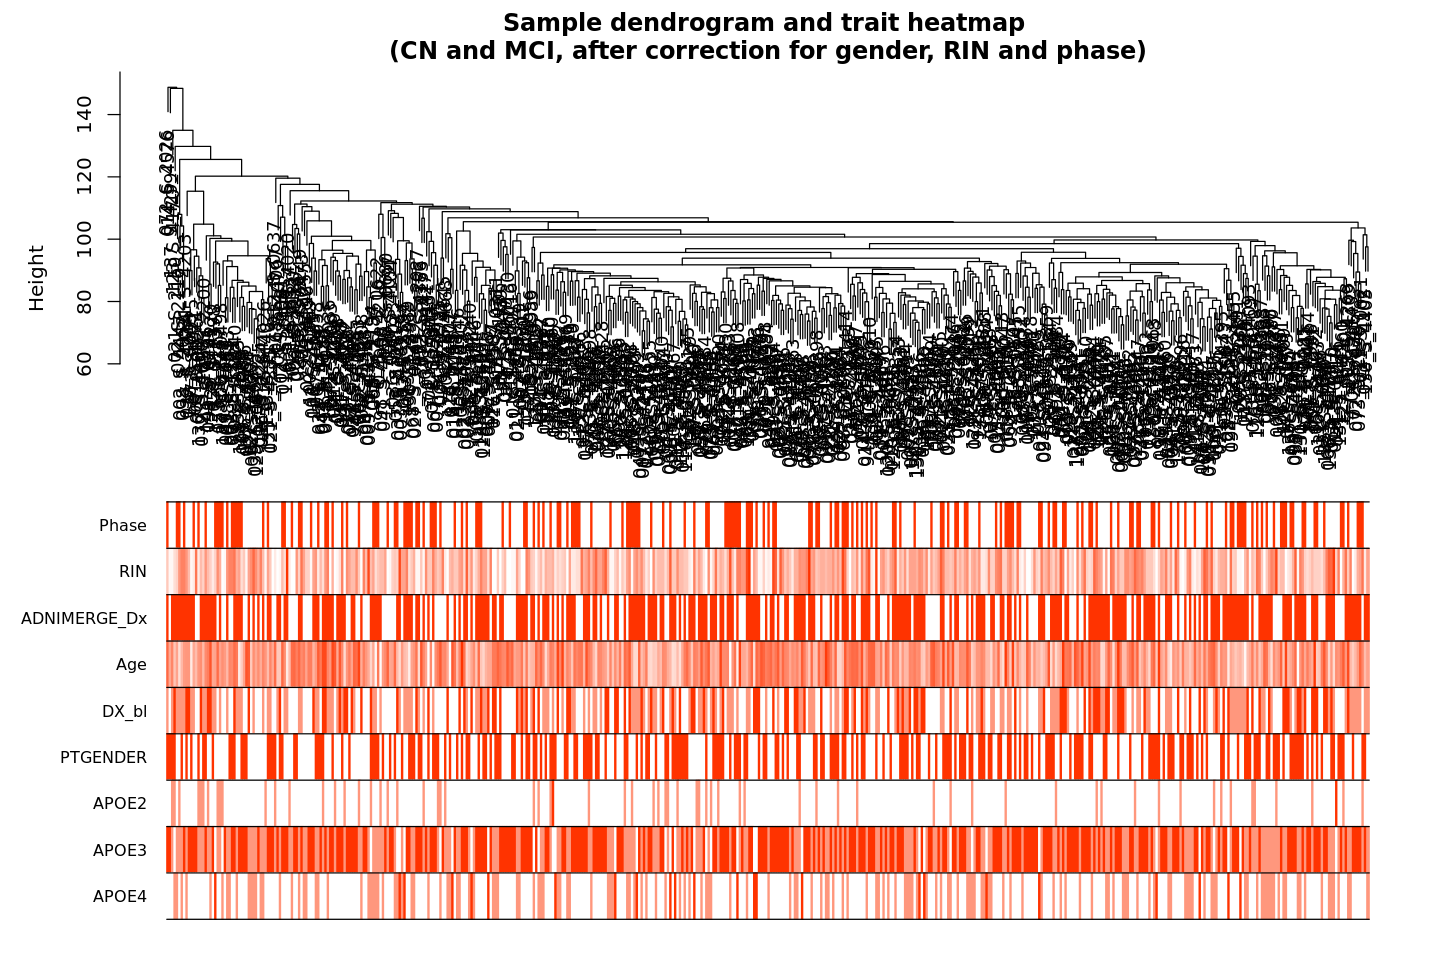

In [39]:
options(repr.plot.width=12, repr.plot.height=8)
# Re-cluster samples
sampleTree2_CN_MCI_gender_rin_phase_corrected <- hclust(dist(datExpr_CN_MCI_gender_rin_phase_corrected), method = "average")
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors_CN_MCI_gender_rin_phase_corrected = numbers2colors(datTraits_CN_MCI_gender_rin_phase_corrected, signed = FALSE);
# Plot the sample dendrogram and the colors underneath.s
plotDendroAndColors(sampleTree2_CN_MCI_gender_rin_phase_corrected, traitColors_CN_MCI_gender_rin_phase_corrected,
                    groupLabels = names(datTraits_CN_MCI_gender_rin_phase_corrected),
                    main = "Sample dendrogram and trait heatmap \n(CN and MCI, after correction for gender, RIN and phase)")

In [40]:
pdf("pairwise_plots/sampleDendro_CN_MCI_gender_rin_phase_corrected.pdf", 
    width = 12, height = 8)

options(repr.plot.width=12, repr.plot.height=8)
# Re-cluster samples
sampleTree2_CN_MCI_gender_rin_phase_corrected <- hclust(dist(datExpr_CN_MCI_gender_rin_phase_corrected), method = "average")
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors_CN_MCI_gender_rin_phase_corrected = numbers2colors(datTraits_CN_MCI_gender_rin_phase_corrected, signed = FALSE);
# Plot the sample dendrogram and the colors underneath.s
plotDendroAndColors(sampleTree2_CN_MCI_gender_rin_phase_corrected, traitColors_CN_MCI_gender_rin_phase_corrected,
                    groupLabels = names(datTraits_CN_MCI_gender_rin_phase_corrected),
                    main = "Sample dendrogram and trait heatmap \n(CN and MCI, after correction for gender, RIN and phase)")

dev.off()

png 
  2

### MCI and AD

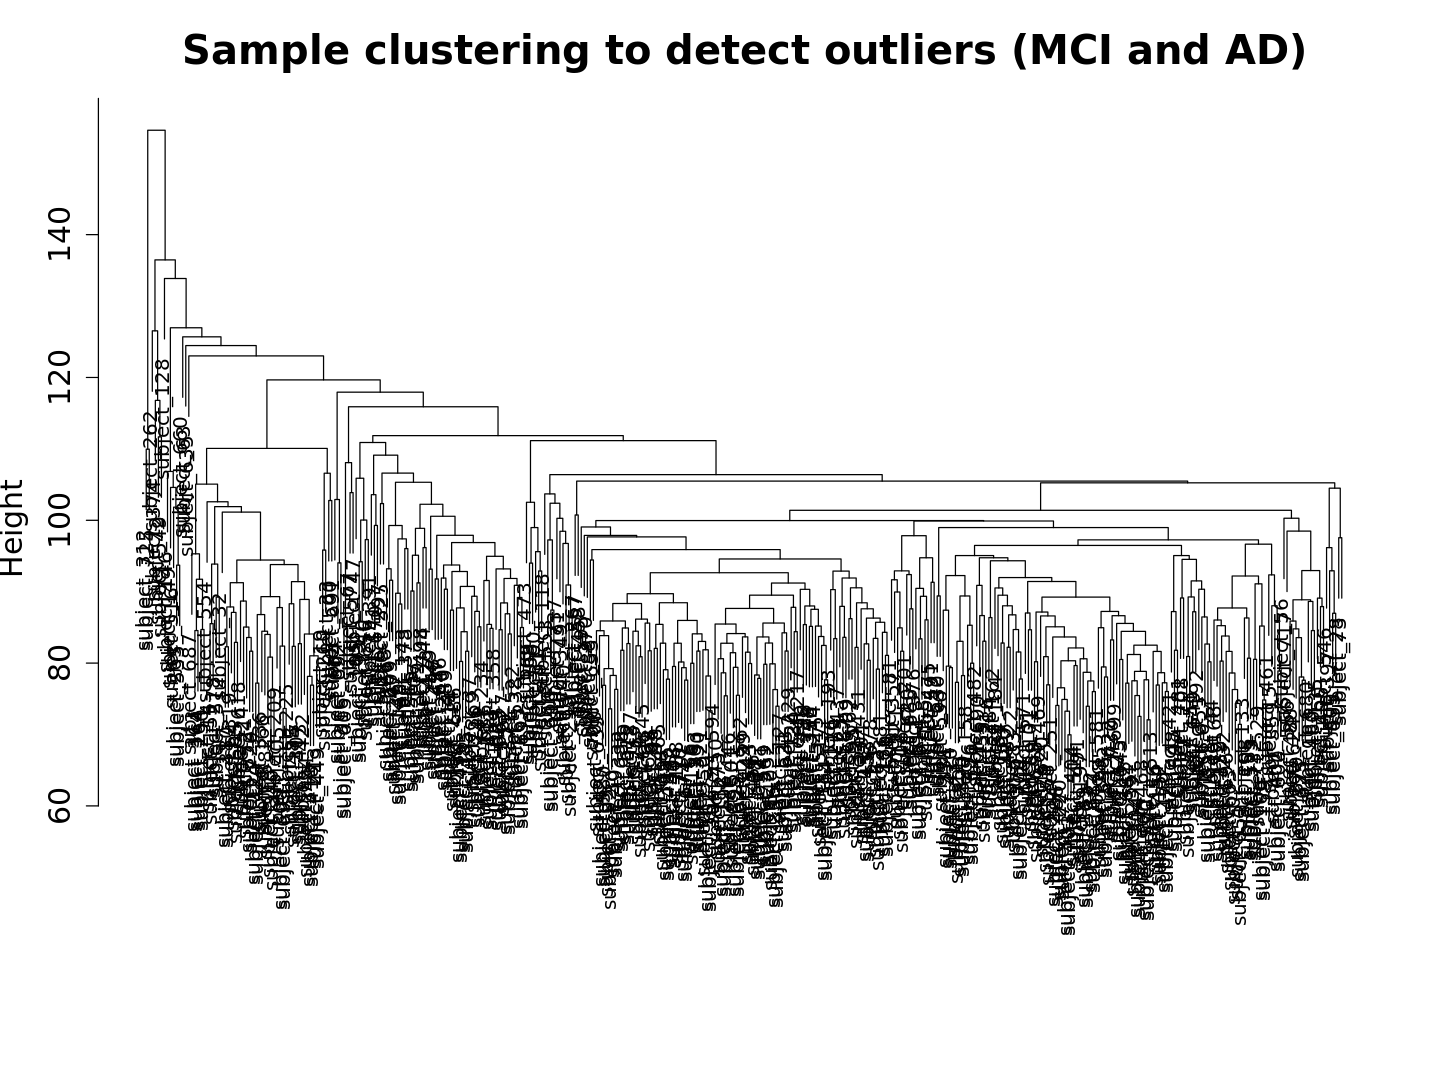

In [26]:
options(repr.plot.width=12, repr.plot.height=9)
sampleTree_MCI_AD <- hclust(dist(datExpr0_MCI_AD), method="average")

# plot sample tree
plot(sampleTree_MCI_AD, main = "Sample clustering to detect outliers (MCI and AD)", sub="", xlab="", cex.lab = 1.5,
     cex.axis = 1.5, cex.main = 2)

In [74]:
# select datTraits subjects based on CN and MCI subjects
datTraits_MCI_AD <- datTraits_allAPOE_selectCols[datExpr0_MCI_AD %>% rownames, ]

# replace CN with 0 and MCI with 1
datTraits_MCI_AD$ADNIMERGE_Dx <- as.character(datTraits_MCI_AD$ADNIMERGE_Dx)
datTraits_MCI_AD$ADNIMERGE_Dx[datTraits_MCI_AD$ADNIMERGE_Dx == "MCI"]  <- 0
datTraits_MCI_AD$ADNIMERGE_Dx[datTraits_MCI_AD$ADNIMERGE_Dx == "Dementia"]  <- 1
datTraits_MCI_AD$ADNIMERGE_Dx  <- as.numeric(datTraits_MCI_AD$ADNIMERGE_Dx)

# convert rownames to subjectID for both datTraits and datExpr
datExpr_MCI_AD <- datExpr0_MCI_AD
rownames(datExpr_MCI_AD) <- datTraits_MCI_AD[rownames(datExpr_MCI_AD), ]$SubjectID
rownames(datTraits_MCI_AD) <- datTraits_MCI_AD$SubjectID
datTraits_MCI_AD <- datTraits_MCI_AD[2:ncol(datTraits_MCI_AD)] # remove subjectID column

datExpr_MCI_AD %>% head
datTraits_MCI_AD %>% head

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,⋯,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
006_S_4153,2.140,2.322,1.999,3.634,2.516,1.957,2.333,4.442,2.544,2.814,⋯,2.165,2.455,1.840,2.681,2.251,1.985,1.770,2.184,2.007,2.134
099_S_4205,2.040,2.395,2.080,3.278,2.251,2.154,2.334,4.536,2.546,2.864,⋯,1.973,2.544,1.909,2.548,2.266,2.077,1.838,2.085,1.941,1.883
007_S_4467,2.439,2.309,1.997,3.578,2.235,2.055,2.450,4.805,2.576,3.043,⋯,2.143,2.653,1.834,2.594,2.432,1.788,1.872,2.266,1.902,1.902
003_S_2374,2.372,2.403,1.926,3.371,2.407,2.084,2.397,4.555,2.422,2.863,⋯,2.153,2.630,1.847,2.652,2.212,2.059,1.916,2.483,1.901,2.027
031_S_2018,2.392,2.411,1.887,3.558,2.178,1.947,2.588,4.938,2.463,2.736,⋯,2.167,2.563,1.895,2.641,2.359,1.980,1.972,2.158,1.931,2.025
002_S_4654,2.089,2.466,2.043,3.295,2.109,2.260,2.725,4.600,2.236,2.599,⋯,2.208,2.820,1.948,3.338,2.568,1.888,1.743,2.091,1.992,2.120


,Phase,RIN,ADNIMERGE_Dx,Age,DX_bl,PTGENDER,APOE2,APOE3,APOE4
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
006_S_4153,0,7.2,1,79,3,0,0,1,1
099_S_4205,0,7.9,0,81,1,1,0,2,0
007_S_4467,0,7.0,0,62,1,1,0,0,2
003_S_2374,1,7.2,0,81,1,1,0,2,0
031_S_2018,1,7.6,0,76,1,1,0,2,0
002_S_4654,0,7.1,0,76,2,1,0,2,0


In [63]:
# Batch correct for effects of PTGENDER and RIN
datExpr_MCI_AD.gender_rin_corrected <- datExpr_MCI_AD %>% t %>% limma::removeBatchEffect(
    batch = (datTraits_allAPOE[datExpr0_MCI_AD %>% rownames,])$PTGENDER, 
    batch2 = (datTraits_allAPOE[datExpr0_MCI_AD %>% rownames,])$RIN) %>% t %>% as.data.frame

datExpr_MCI_AD.gender_rin_corrected %>% head

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,⋯,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
006_S_4153,2.172659,2.283846,2.017980,3.648613,2.487307,1.958916,2.326436,4.438893,2.558393,2.797697,⋯,2.140456,2.481665,1.841994,2.681552,2.242652,2.018435,1.767782,2.197650,2.011280,2.113394
099_S_4205,2.135576,2.479285,2.107138,3.342399,2.215812,2.134741,2.415243,4.667276,2.569472,2.890124,⋯,2.021473,2.578349,2.015692,2.588253,2.273593,2.081387,1.838835,2.192681,2.007148,1.897517
007_S_4467,2.459705,2.295454,1.990295,3.570652,2.236685,2.061728,2.437274,4.670469,2.516641,3.025899,⋯,2.196593,2.664394,1.807077,2.589393,2.430743,1.755678,1.848331,2.294947,1.897380,1.951356
003_S_2374,2.404350,2.382913,1.956593,3.371882,2.405539,2.098141,2.403583,4.551708,2.420961,2.869301,⋯,2.146423,2.663974,1.868731,2.653903,2.211562,2.060181,1.905786,2.502749,1.917144,2.025165
031_S_2018,2.403527,2.434515,1.911459,3.598474,2.182784,1.942213,2.612027,4.979001,2.486202,2.776399,⋯,2.173399,2.572415,1.910416,2.657975,2.344253,1.973417,1.967881,2.155362,1.943769,2.022027
002_S_4654,2.142139,2.495397,2.085994,3.274285,2.164798,2.265866,2.731411,4.549074,2.218028,2.617664,⋯,2.218683,2.821547,1.953911,3.304579,2.549448,1.860623,1.750290,2.095060,1.976819,2.089242


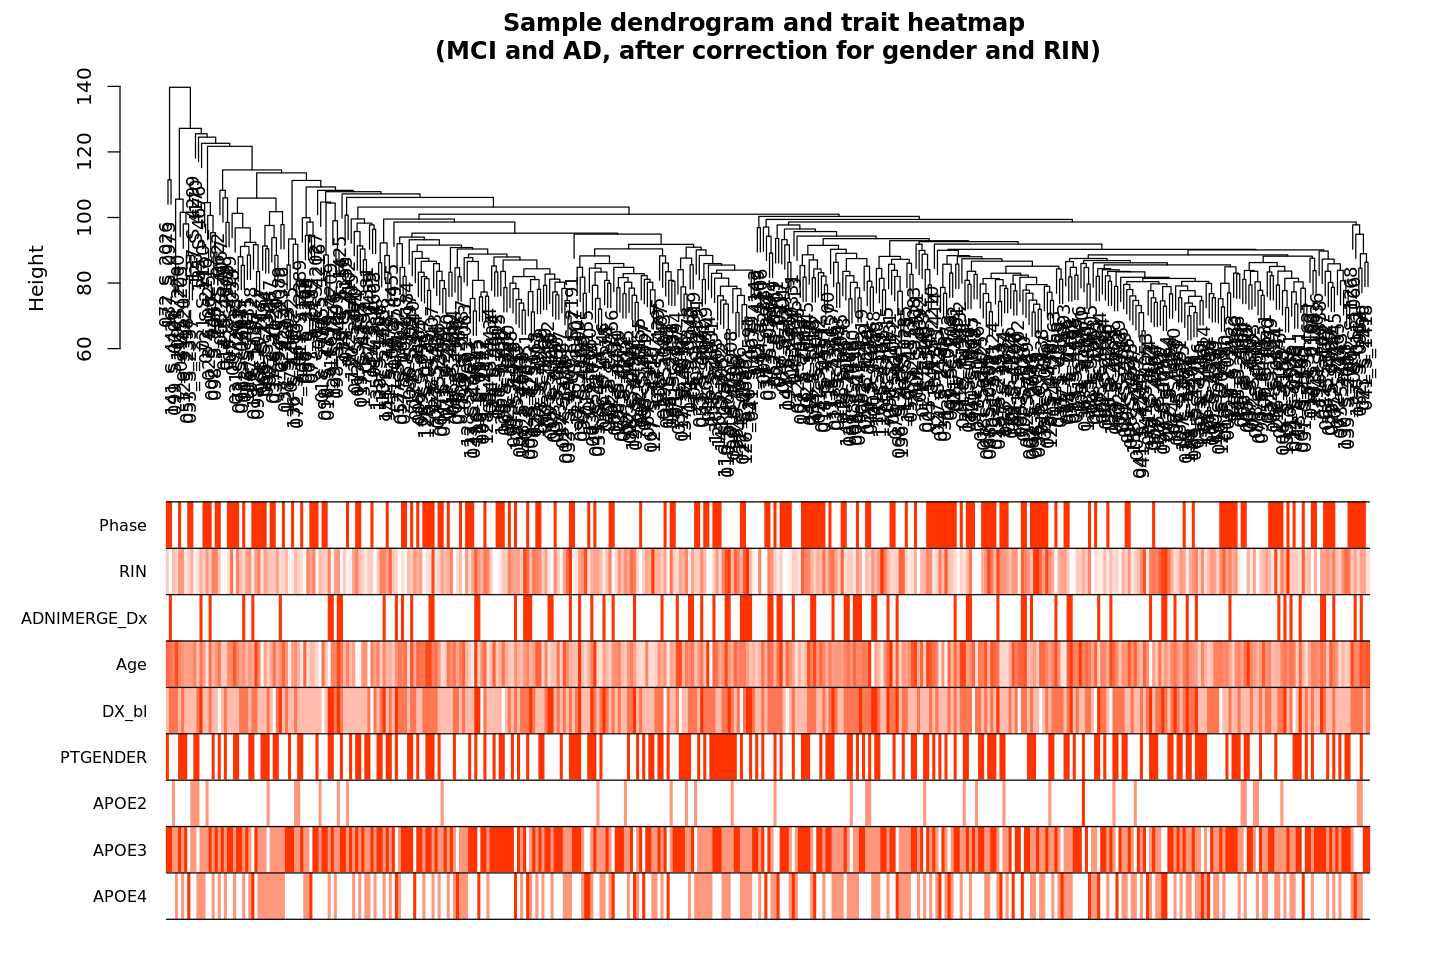

In [75]:
options(repr.plot.width=12, repr.plot.height=8)
# Re-cluster samples
sampleTree2_MCI_AD <- hclust(dist(datExpr_MCI_AD.gender_rin_corrected), method = "average")
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors_MCI_AD= numbers2colors(datTraits_MCI_AD, signed = FALSE);
# Plot the sample dendrogram and the colors underneath.s
plotDendroAndColors(sampleTree2_MCI_AD, traitColors_MCI_AD,
                    groupLabels = names(datTraits_MCI_AD),
                    main = "Sample dendrogram and trait heatmap \n(MCI and AD, after correction for gender and RIN)")

In [79]:
pdf("pairwise_plots/sampleDendro_MCI_AD_limmaCorrected.pdf", 
    width = 12, height = 8)

options(repr.plot.width=12, repr.plot.height=8)
# Plot the sample dendrogram and the colors underneath.s
plotDendroAndColors(sampleTree2_MCI_AD, traitColors_MCI_AD,
                    groupLabels = names(datTraits_MCI_AD),
                    main = "Sample dendrogram and trait heatmap \n(MCI and AD, after correction for gender and RIN)")

dev.off()

png 
  2

In [41]:
# Batch correct for effects of PTGENDER, RIN AND PHASE
design_MCI_AD <- model.matrix(~ (datTraits_allAPOE[datExpr0_MCI_AD %>% rownames,])$ADNIMERGE_Dx + 
                       (datTraits_allAPOE[datExpr0_MCI_AD %>% rownames,])$Phase + 
                       (datTraits_allAPOE[datExpr0_MCI_AD %>% rownames,])$RIN + 
                       (datTraits_allAPOE[datExpr0_MCI_AD %>% rownames,])$PTGENDER,
                       data=datExpr0_MCI_AD)

design_MCI_AD %>% head

,(Intercept),"(datTraits_allAPOE[datExpr0_MCI_AD %>% rownames, ])$ADNIMERGE_DxMCI","(datTraits_allAPOE[datExpr0_MCI_AD %>% rownames, ])$PhaseADNIGO","(datTraits_allAPOE[datExpr0_MCI_AD %>% rownames, ])$RIN","(datTraits_allAPOE[datExpr0_MCI_AD %>% rownames, ])$PTGENDERMale"
subject_3,1,0,0,7.2,1
subject_5,1,1,0,7.9,0
subject_6,1,1,0,7.0,0
subject_8,1,1,1,7.2,0
subject_11,1,1,1,7.6,0
subject_12,1,1,0,7.1,0


In [42]:
treatment.design_MCI_AD <- design_MCI_AD[,1:2]
batch.design_MCI_AD <- design_MCI_AD[,-(1:2)]
corrected_df_MCI_AD <- removeBatchEffect(t(datExpr0_MCI_AD),
                                        design=treatment.design_MCI_AD,
                                        covariates=batch.design_MCI_AD) %>% t %>% as.data.frame

In [43]:
corrected_df_MCI_AD %>% head
datExpr0_MCI_AD_gender_rin_phase_corrected <- corrected_df_MCI_AD

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,⋯,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
subject_3,2.498871,3.298384,2.490754,4.717567,2.820495,2.139722,2.400259,5.919687,2.758090,3.024025,⋯,2.282679,2.610901,2.135283,3.034905,2.454007,2.339111,1.874975,2.482679,2.301732,2.259000
subject_5,2.435093,3.487777,2.627982,4.459775,2.614520,2.360050,2.418309,6.159587,2.763322,3.116592,⋯,2.120287,2.722919,2.252870,2.937016,2.492512,2.431131,1.943259,2.416039,2.275997,2.041500
subject_6,2.789082,3.277284,2.482553,4.625143,2.557106,2.237576,2.524704,6.243621,2.768564,3.266816,⋯,2.273508,2.811536,2.138695,2.938697,2.632707,2.101787,1.965267,2.559325,2.198833,2.042443
subject_8,2.760514,3.405506,2.426210,4.378384,2.699329,2.290978,2.486557,5.987699,2.645837,3.071218,⋯,2.299023,2.802011,2.156452,3.005261,2.421211,2.385418,2.008848,2.790478,2.187321,2.160031
subject_11,2.800518,3.468836,2.414956,4.625221,2.488735,2.164411,2.681826,6.452906,2.697840,2.957008,⋯,2.320480,2.744070,2.221863,3.013958,2.579680,2.324348,2.070177,2.482240,2.234283,2.166056
subject_12,2.444084,3.448116,2.535490,4.357102,2.435708,2.445184,2.800771,6.059173,2.431315,2.826013,⋯,2.340372,2.980800,2.257047,3.687622,2.771574,2.206270,1.837600,2.388516,2.293073,2.262449


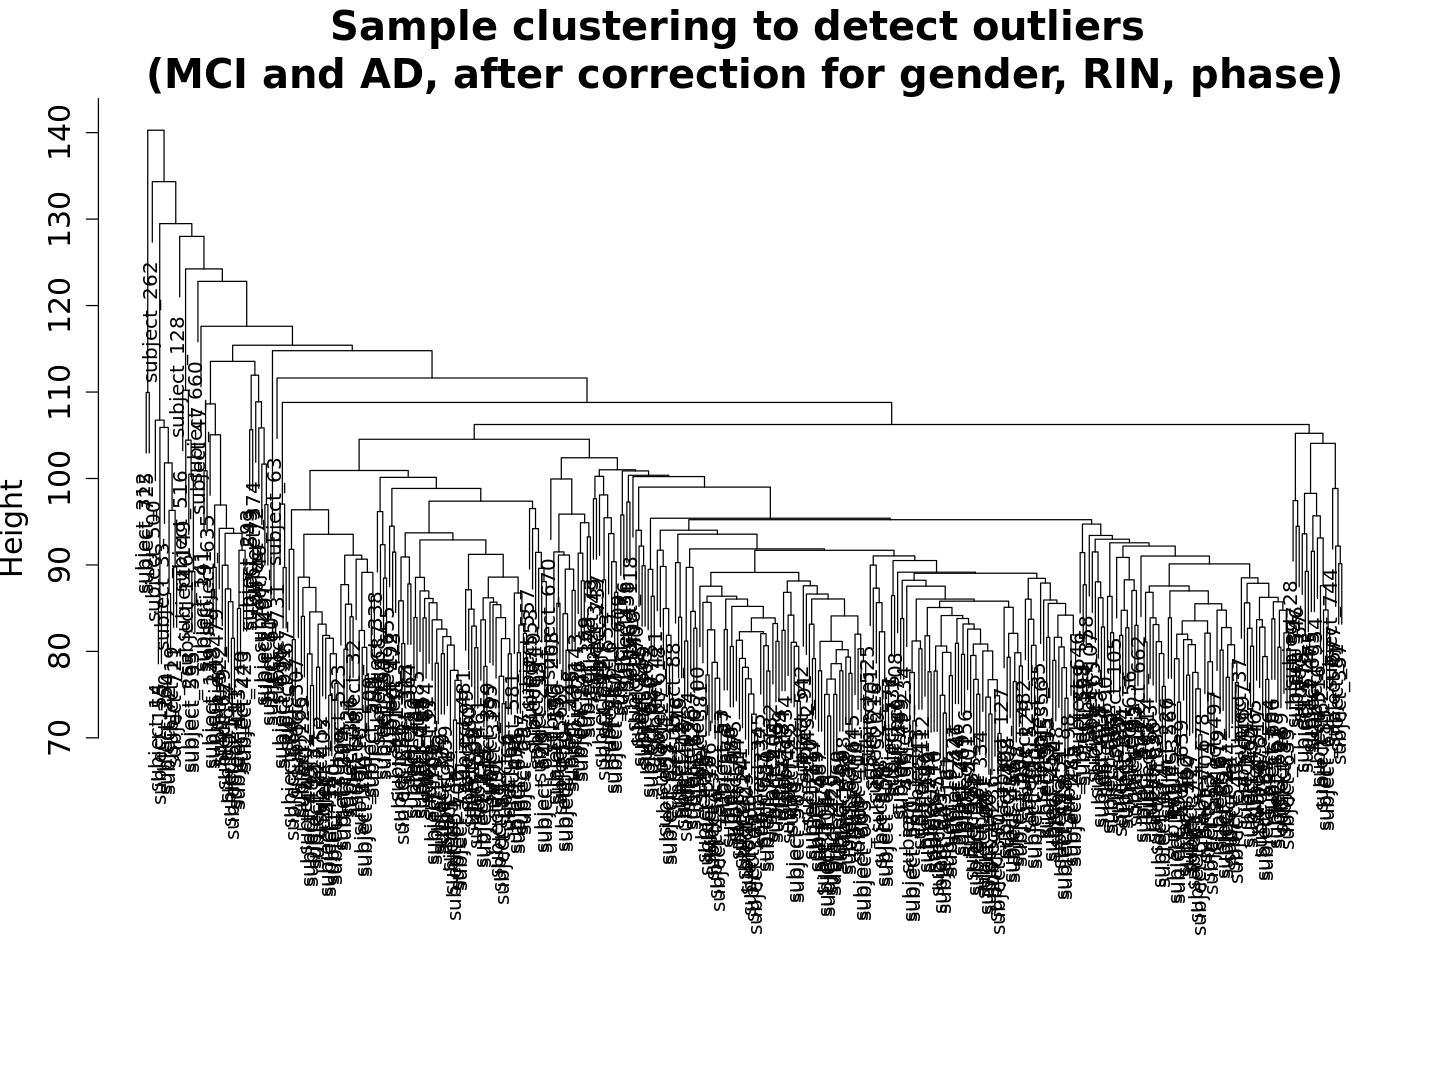

In [44]:
options(repr.plot.width=12, repr.plot.height=9)
sampleTree_MCI_AD_corrected <- hclust(dist(datExpr0_MCI_AD_gender_rin_phase_corrected), method="average")

# plot sample tree
plot(sampleTree_MCI_AD_corrected, 
     main = "Sample clustering to detect outliers \n(MCI and AD, after correction for gender, RIN, phase)", 
     sub="", xlab="", cex.lab = 1.5,
     cex.axis = 1.5, cex.main = 2)

In [45]:
# select datTraits subjects based on MCI and AD subjects
datTraits_MCI_AD_gender_rin_phase_corrected <- datTraits_allAPOE_selectCols[datExpr0_MCI_AD_gender_rin_phase_corrected %>% rownames, ]

# replace CN with 0 and AD with 1
datTraits_MCI_AD_gender_rin_phase_corrected$ADNIMERGE_Dx <- as.character(datTraits_MCI_AD_gender_rin_phase_corrected$ADNIMERGE_Dx)
datTraits_MCI_AD_gender_rin_phase_corrected$ADNIMERGE_Dx[datTraits_MCI_AD_gender_rin_phase_corrected$ADNIMERGE_Dx == "MCI"]  <- 0
datTraits_MCI_AD_gender_rin_phase_corrected$ADNIMERGE_Dx[datTraits_MCI_AD_gender_rin_phase_corrected$ADNIMERGE_Dx == "Dementia"]  <- 1
datTraits_MCI_AD_gender_rin_phase_corrected$ADNIMERGE_Dx  <- as.numeric(datTraits_MCI_AD_gender_rin_phase_corrected$ADNIMERGE_Dx)

# convert rownames to subjectID for both datTraits and datExpr
datExpr_MCI_AD_gender_rin_phase_corrected <- datExpr0_MCI_AD_gender_rin_phase_corrected
rownames(datExpr_MCI_AD_gender_rin_phase_corrected) <- datTraits_MCI_AD_gender_rin_phase_corrected[rownames(datExpr_MCI_AD_gender_rin_phase_corrected), ]$SubjectID
rownames(datTraits_MCI_AD_gender_rin_phase_corrected) <- datTraits_MCI_AD_gender_rin_phase_corrected$SubjectID
datTraits_MCI_AD_gender_rin_phase_corrected <- datTraits_MCI_AD_gender_rin_phase_corrected[2:ncol(datTraits_MCI_AD_gender_rin_phase_corrected)] # remove subjectID column

datExpr_MCI_AD_gender_rin_phase_corrected %>% head
datTraits_MCI_AD_gender_rin_phase_corrected %>% head

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,⋯,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
006_S_4153,2.498871,3.298384,2.490754,4.717567,2.820495,2.139722,2.400259,5.919687,2.758090,3.024025,⋯,2.282679,2.610901,2.135283,3.034905,2.454007,2.339111,1.874975,2.482679,2.301732,2.259000
099_S_4205,2.435093,3.487777,2.627982,4.459775,2.614520,2.360050,2.418309,6.159587,2.763322,3.116592,⋯,2.120287,2.722919,2.252870,2.937016,2.492512,2.431131,1.943259,2.416039,2.275997,2.041500
007_S_4467,2.789082,3.277284,2.482553,4.625143,2.557106,2.237576,2.524704,6.243621,2.768564,3.266816,⋯,2.273508,2.811536,2.138695,2.938697,2.632707,2.101787,1.965267,2.559325,2.198833,2.042443
003_S_2374,2.760514,3.405506,2.426210,4.378384,2.699329,2.290978,2.486557,5.987699,2.645837,3.071218,⋯,2.299023,2.802011,2.156452,3.005261,2.421211,2.385418,2.008848,2.790478,2.187321,2.160031
031_S_2018,2.800518,3.468836,2.414956,4.625221,2.488735,2.164411,2.681826,6.452906,2.697840,2.957008,⋯,2.320480,2.744070,2.221863,3.013958,2.579680,2.324348,2.070177,2.482240,2.234283,2.166056
002_S_4654,2.444084,3.448116,2.535490,4.357102,2.435708,2.445184,2.800771,6.059173,2.431315,2.826013,⋯,2.340372,2.980800,2.257047,3.687622,2.771574,2.206270,1.837600,2.388516,2.293073,2.262449


,Phase,RIN,ADNIMERGE_Dx,Age,DX_bl,PTGENDER,APOE2,APOE3,APOE4
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
006_S_4153,0,7.2,1,79,3,0,0,1,1
099_S_4205,0,7.9,0,81,1,1,0,2,0
007_S_4467,0,7.0,0,62,1,1,0,0,2
003_S_2374,1,7.2,0,81,1,1,0,2,0
031_S_2018,1,7.6,0,76,1,1,0,2,0
002_S_4654,0,7.1,0,76,2,1,0,2,0


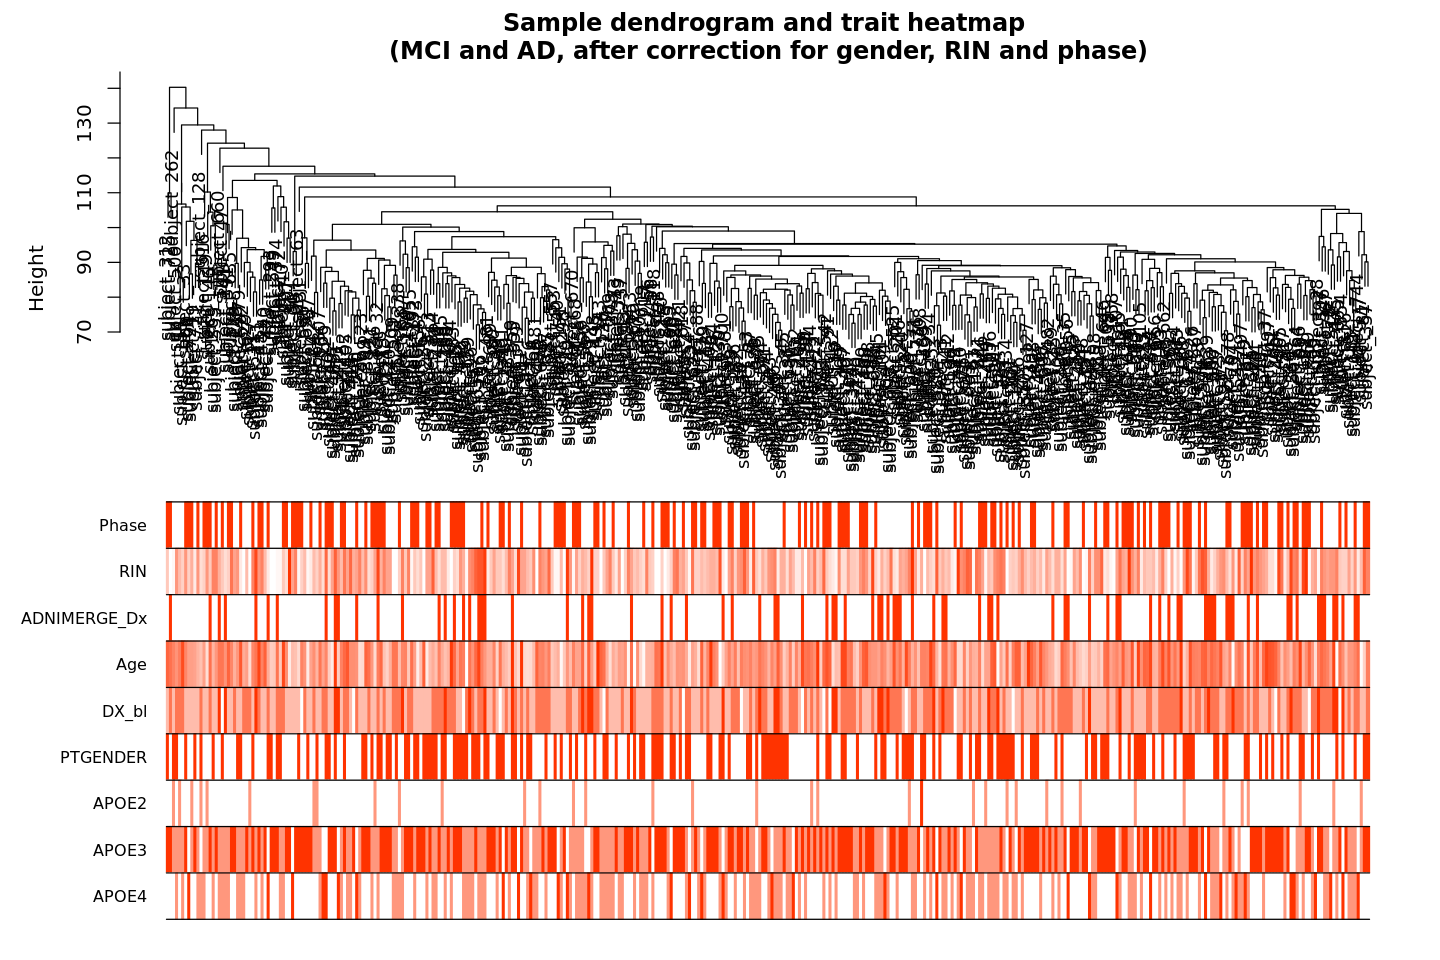

In [46]:
options(repr.plot.width=12, repr.plot.height=8)
# Re-cluster samples
# sampleTree2_MCI_AD_gender_rin_phase_corrected <- hclust(dist(datExpr_MCI_AD_gender_rin_phase_corrected), method = "average")
sampleTree2_MCI_AD_gender_rin_phase_corrected  <- sampleTree_MCI_AD_corrected
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors_MCI_AD_gender_rin_phase_corrected = numbers2colors(datTraits_MCI_AD_gender_rin_phase_corrected, signed = FALSE);
# Plot the sample dendrogram and the colors underneath.s
plotDendroAndColors(sampleTree2_MCI_AD_gender_rin_phase_corrected, traitColors_MCI_AD_gender_rin_phase_corrected,
                    groupLabels = names(datTraits_MCI_AD_gender_rin_phase_corrected),
                    main = "Sample dendrogram and trait heatmap \n(MCI and AD, after correction for gender, RIN and phase)")

In [47]:
pdf("pairwise_plots/sampleDendro_MCI_AD_gender_rin_phase_corrected.pdf", 
    width = 12, height = 8)

options(repr.plot.width=12, repr.plot.height=8)
# Re-cluster samples
# sampleTree2_MCI_AD_gender_rin_phase_corrected <- hclust(dist(datExpr_MCI_AD_gender_rin_phase_corrected), method = "average")
sampleTree2_MCI_AD_gender_rin_phase_corrected <- sampleTree_MCI_AD_corrected
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors_MCI_AD_gender_rin_phase_corrected = numbers2colors(datTraits_MCI_AD_gender_rin_phase_corrected, signed = FALSE);
# Plot the sample dendrogram and the colors underneath.s
plotDendroAndColors(sampleTree2_MCI_AD_gender_rin_phase_corrected, traitColors_MCI_AD_gender_rin_phase_corrected,
                    groupLabels = names(datTraits_MCI_AD_gender_rin_phase_corrected),
                    main = "Sample dendrogram and trait heatmap \n(MCI and AD, after correction for gender, RIN and phase)")

dev.off()

png 
  2

In [76]:
save(datExpr_CN_AD.gender_rin_corrected, datExpr_CN_MCI.gender_rin_corrected, datExpr_MCI_AD.gender_rin_corrected, 
     datTraits_CN_AD, datTraits_CN_MCI, datTraits_MCI_AD, 
     file = "pairwise_RData_files/pairwise_WGCNA_ADNI_allSubjects-01-dataInput.RData")

In [48]:
save(datExpr_CN_AD_gender_rin_phase_corrected, datExpr_CN_MCI_gender_rin_phase_corrected, 
     datExpr_MCI_AD_gender_rin_phase_corrected, datTraits_CN_AD_gender_rin_phase_corrected, 
     datTraits_CN_MCI_gender_rin_phase_corrected, datTraits_MCI_AD_gender_rin_phase_corrected, 
     file = "pairwise_RData_files/20230419_pairwise_WGCNA_ADNI_allSubjects_gender_rin_phase_corrected-01-dataInput.RData")